<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Chemical-Data" data-toc-modified-id="Import-Chemical-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Chemical Data</a></span></li><li><span><a href="#EGO-utilities" data-toc-modified-id="EGO-utilities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EGO utilities</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examples</a></span></li></ul></div>

# EGO decompositions

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx
import toolz as tz
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger, verbosity=1)
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate graphs

Generated 55 graphs


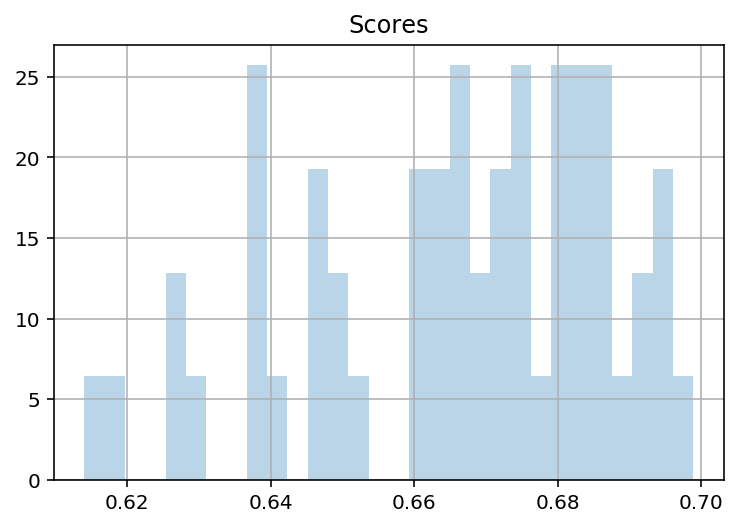

Best graphs in initial sample of 10


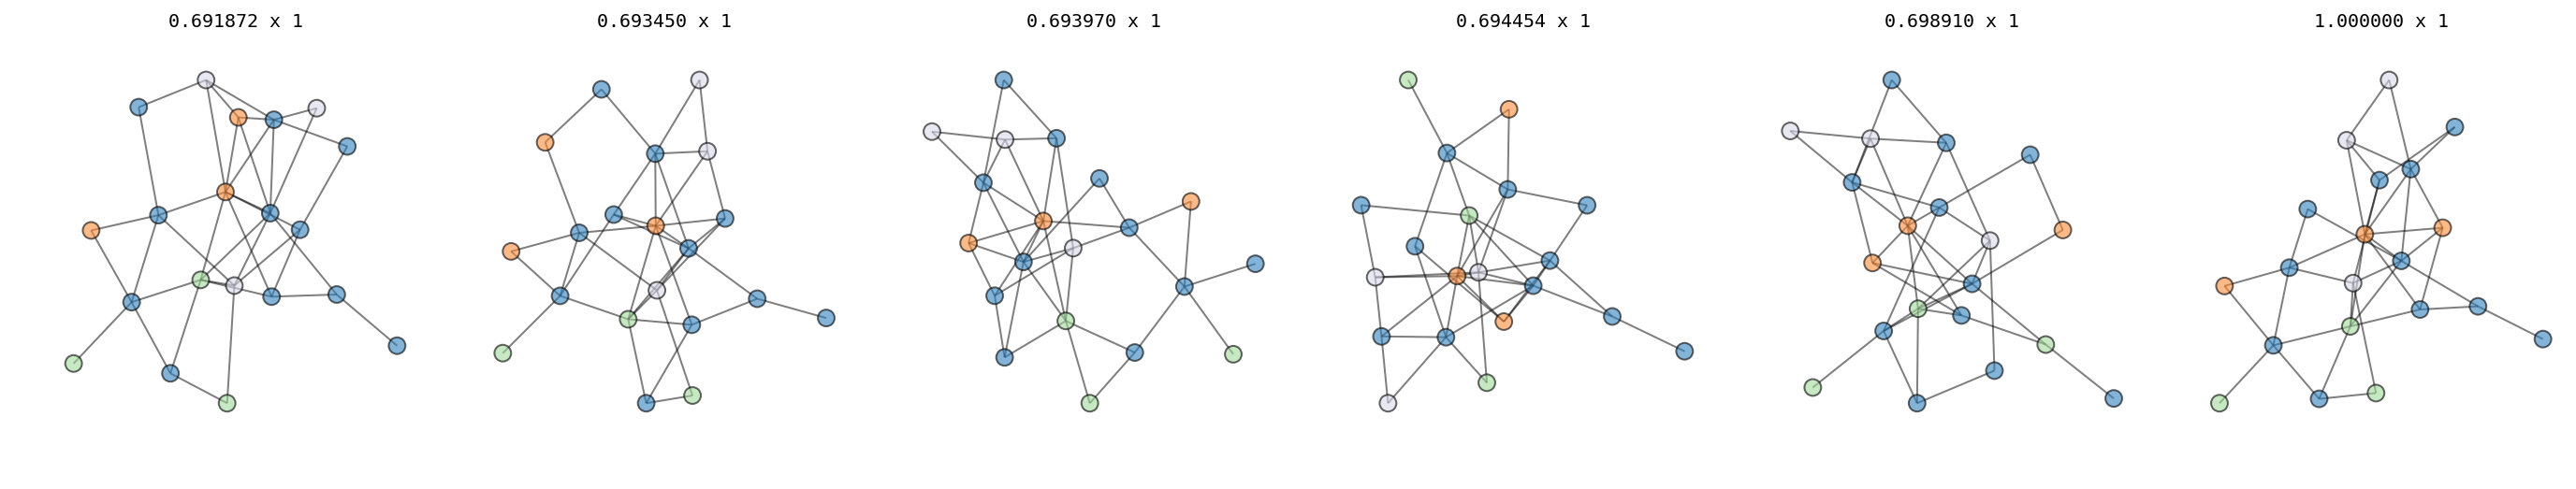

CPU times: user 1min 28s, sys: 1.06 s, total: 1min 29s
Wall time: 1min 29s


In [32]:
%%time

EXPERIMENT_TYPE = 'ARTIFICIAL'

if EXPERIMENT_TYPE == 'ARTIFICIAL':
    from utils_artificial import build_artificial_experiment
    from utils_artificial import display_ktop_graphs, draw_graphs, draw_history
    from utils_artificial import display_score_statistics
    from utils_artificial import remove_duplicates
    res = build_artificial_experiment(
        GRAPH_TYPE='dense', # path  tree  degree  regular  dense
        instance_size=20,
        n_init_instances=10, 
        n_domain_instances=100,
        alphabet_size=4, 
        diversity=3, 
        max_score_threshold=.7)
    
if EXPERIMENT_TYPE == 'CHEMICAL':
    from utils_chemoinformatics import build_chemical_experiment
    from utils_chemoinformatics import display_ktop_graphs, draw_graphs, draw_history
    from utils_chemoinformatics import display_score_statistics
    from utils_chemoinformatics import remove_duplicates
    res = build_chemical_experiment(
        assay_id='624249',  # assay_ids = ['624466','492992','463230','651741','743219','588350','492952','624249','463213','2631','651610']
        n_init_instances=50, 
        n_domain_instances=300,
        max_score_threshold=.8,
        n_targets=4)

init_graphs, domain_graphs, oracle_func, target_graph = res
print('Generated %d graphs'%len(domain_graphs))
display_score_statistics(domain_graphs, oracle_func)

print('Best graphs in initial sample of %d'%len(init_graphs))
display_ktop_graphs(init_graphs+[target_graph], oracle_func, n_max=6)

In [33]:
graphs = [target_graph]+init_graphs[:0]

## EGO utilities

In [34]:
from ego.setup import *

In [35]:
from collections import defaultdict

def select_unique(codes, fragments):
    already_seen = set()
    unique_codes=[]
    unique_fragments=[]
    code_counts = defaultdict(int)
    for code, fragment in zip(codes, fragments):
        if code not in already_seen:
            unique_codes.append(code)
            unique_fragments.append(fragment)
            already_seen.add(code)
        code_counts[code] += 1
    return unique_codes, unique_fragments, code_counts

def draw_decomposition_graphs(graphs, decompose_funcs, preprocessors=None, draw_graphs=None):
    feature_size, bitmask = set_feature_size(nbits=14)
    encoding_func = make_encoder(decompose_funcs, preprocessors=preprocessors, bitmask=bitmask, seed=1)
    for g in graphs:
        print('_'*80)
        draw_graphs([g],[''])
        codes, fragments = encoding_func(g)
        unique_codes, unique_fragments, code_counts = select_unique(codes, fragments)
        titles = ['%d   #%d'%(id,code_counts[id]) for id in unique_codes]
        print('%d unique components in %d fragments'%(len(unique_codes),len(codes)))
        if unique_fragments:
            draw_graphs(unique_fragments, titles, n_graphs_per_line=6)
        else:
            print('No fragments')

## Examples

________________________________________________________________________________


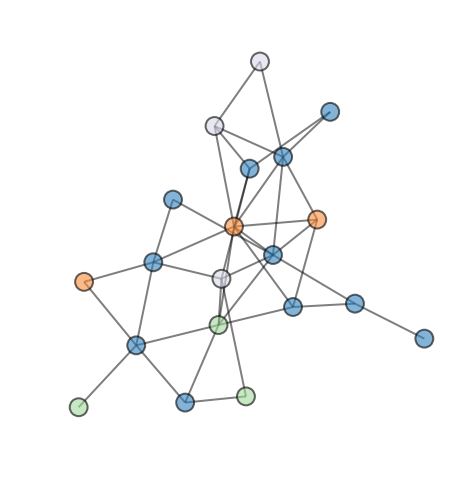

19 unique components in 20 fragments


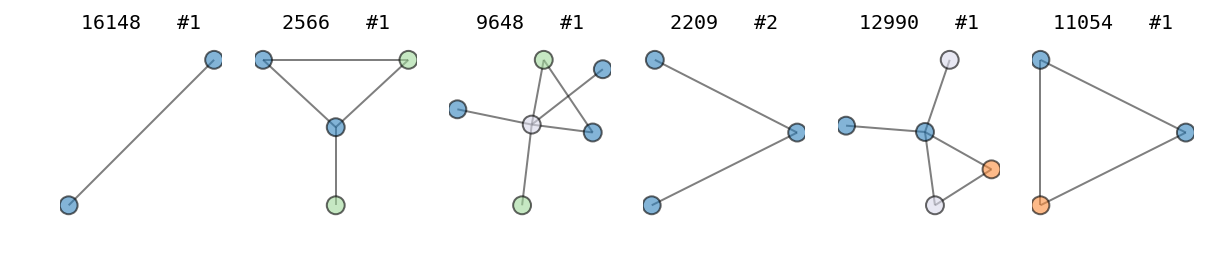

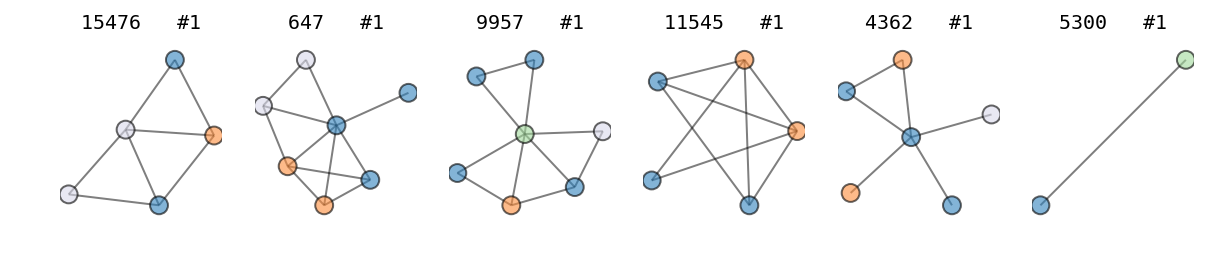

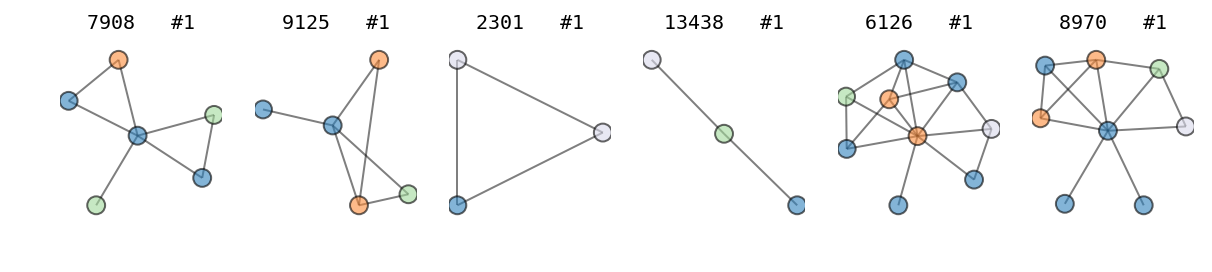

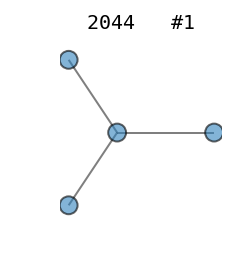

In [36]:
df = decompose_neighborhood
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


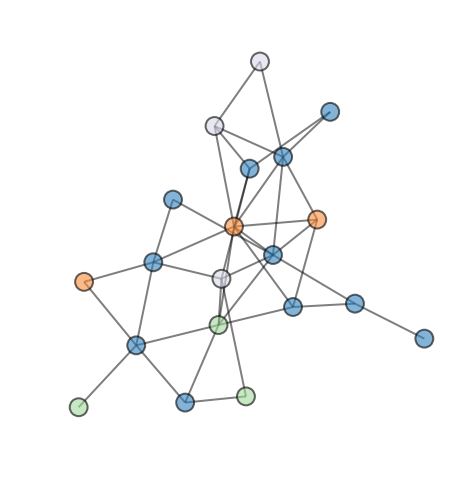

31 unique components in 39 fragments


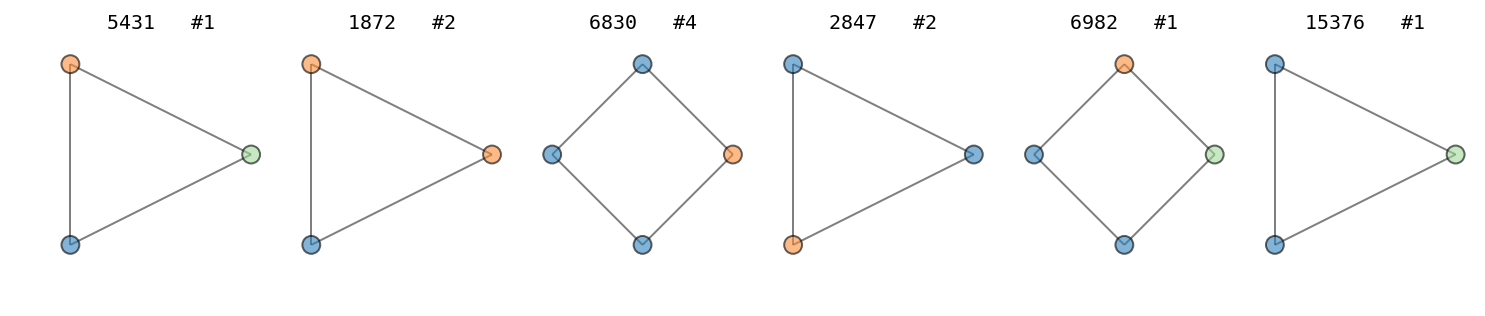

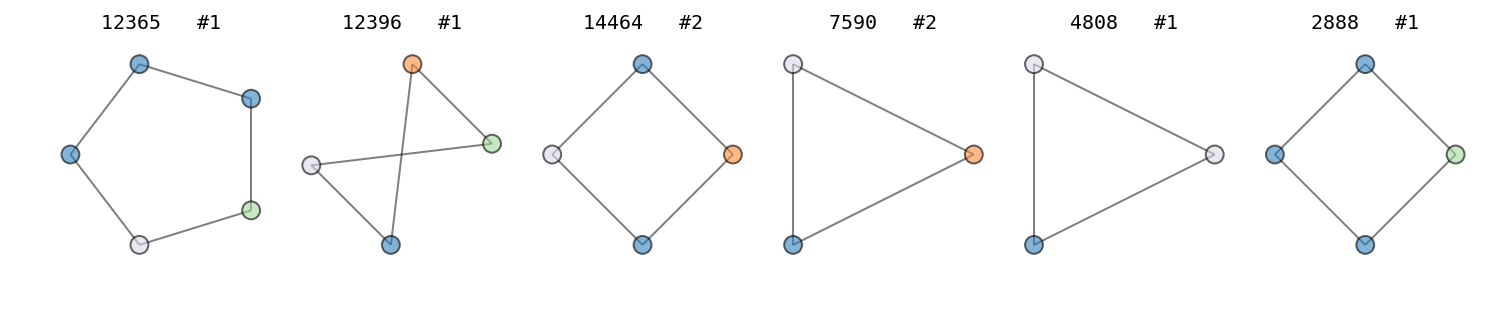

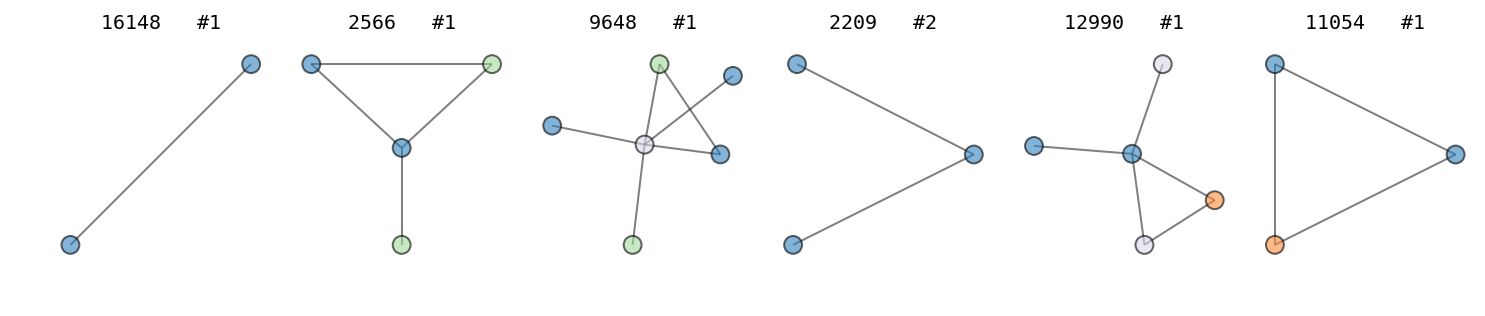

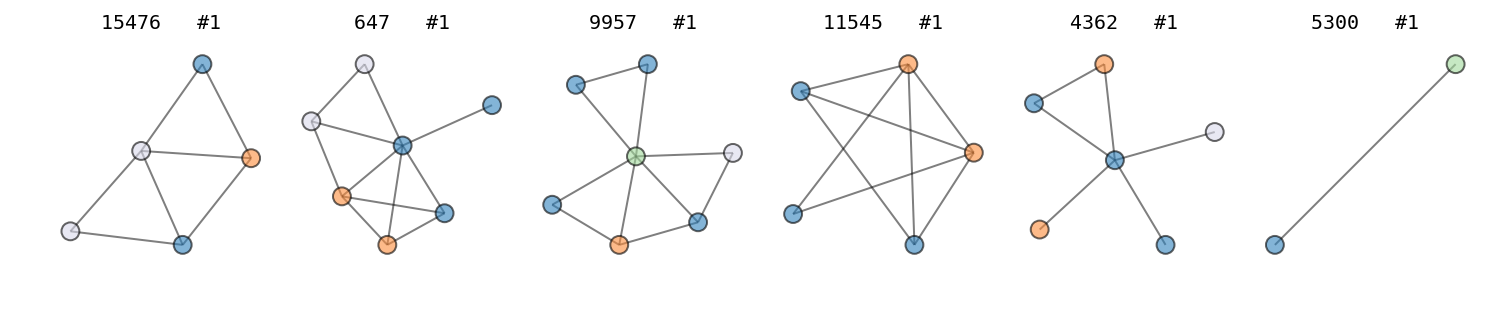

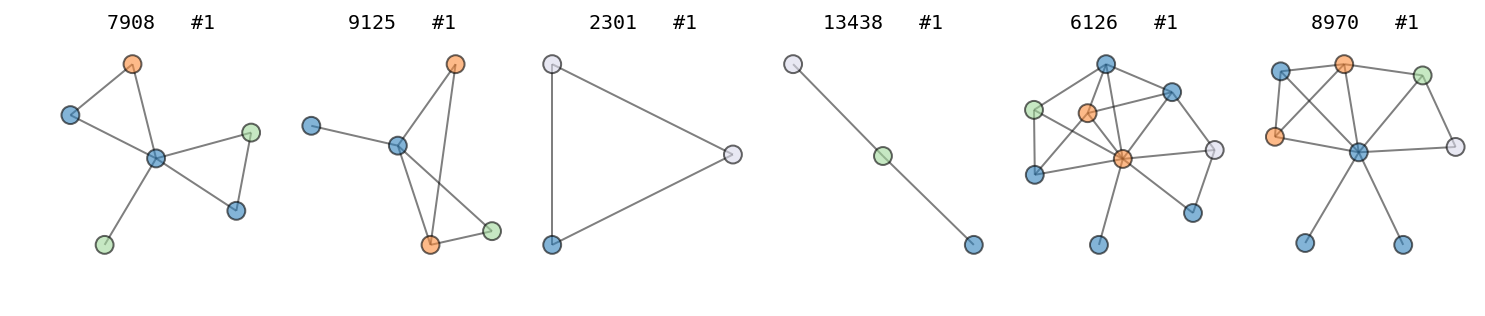

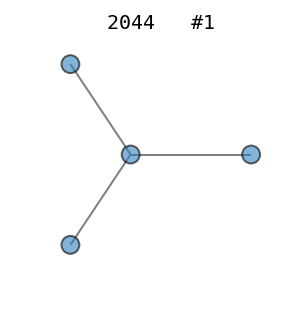

In [37]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_identity)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


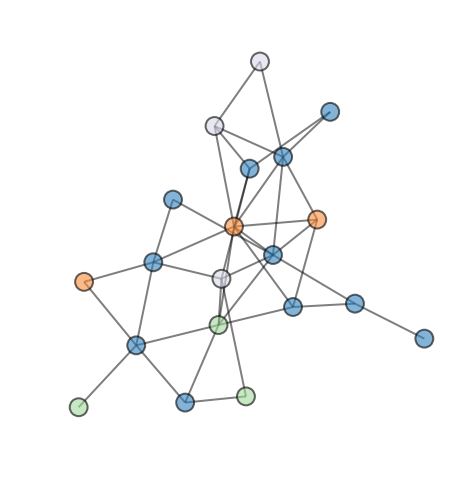

24 unique components in 32 fragments


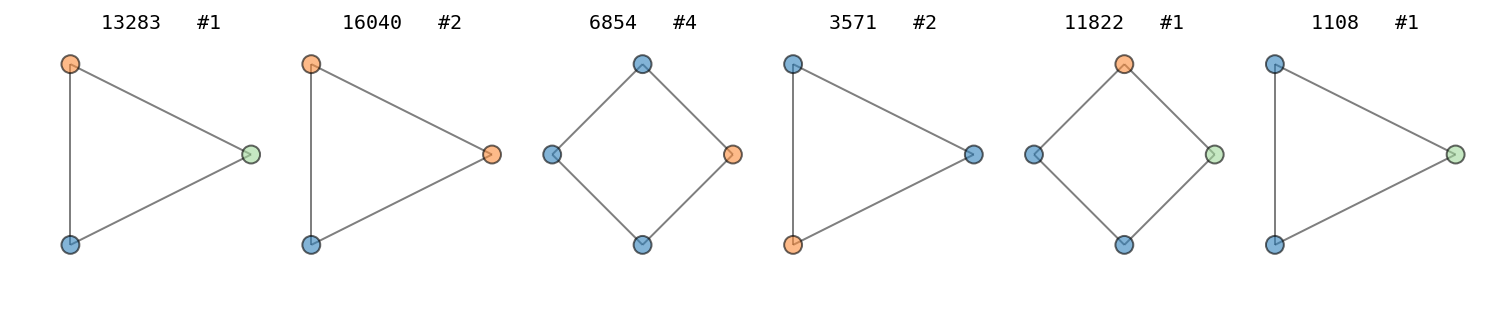

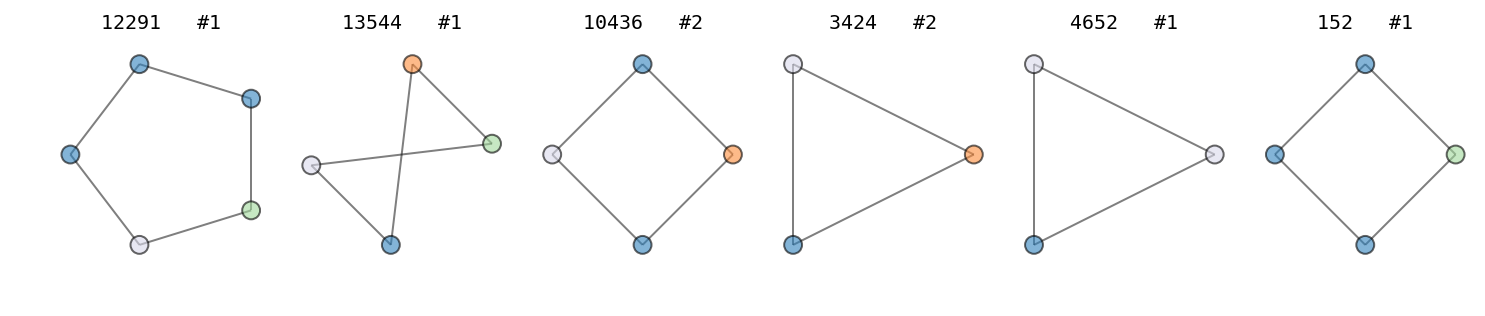

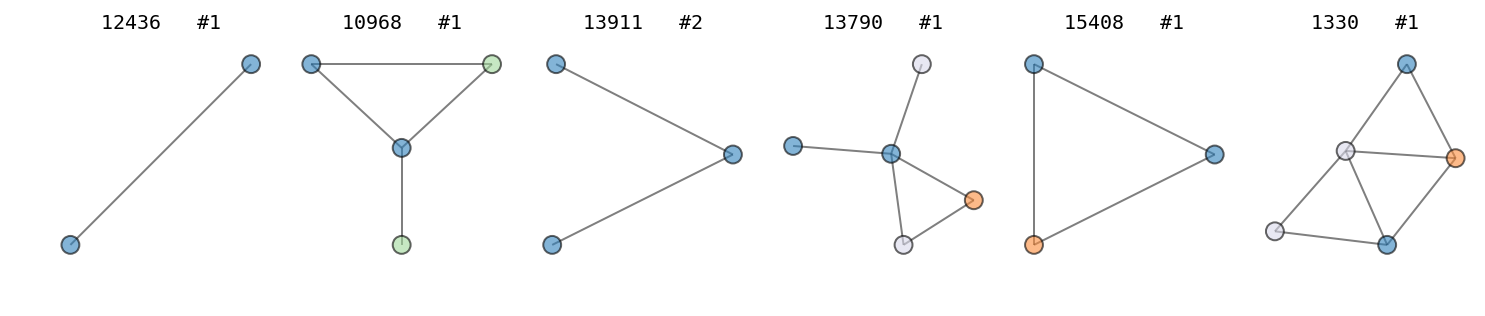

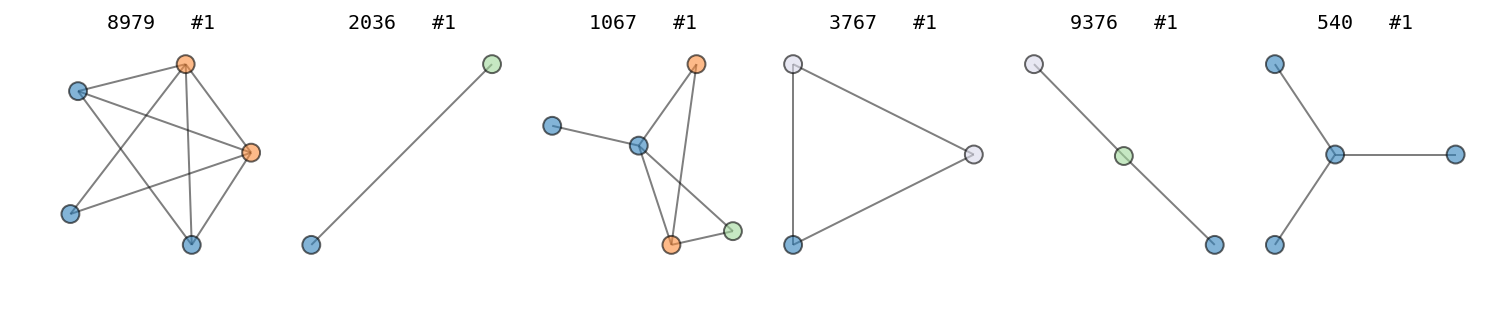

In [38]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_node_size(max_size=5))
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


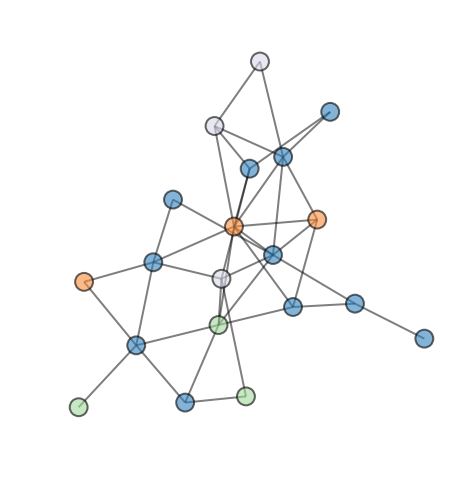

206 unique components in 230 fragments


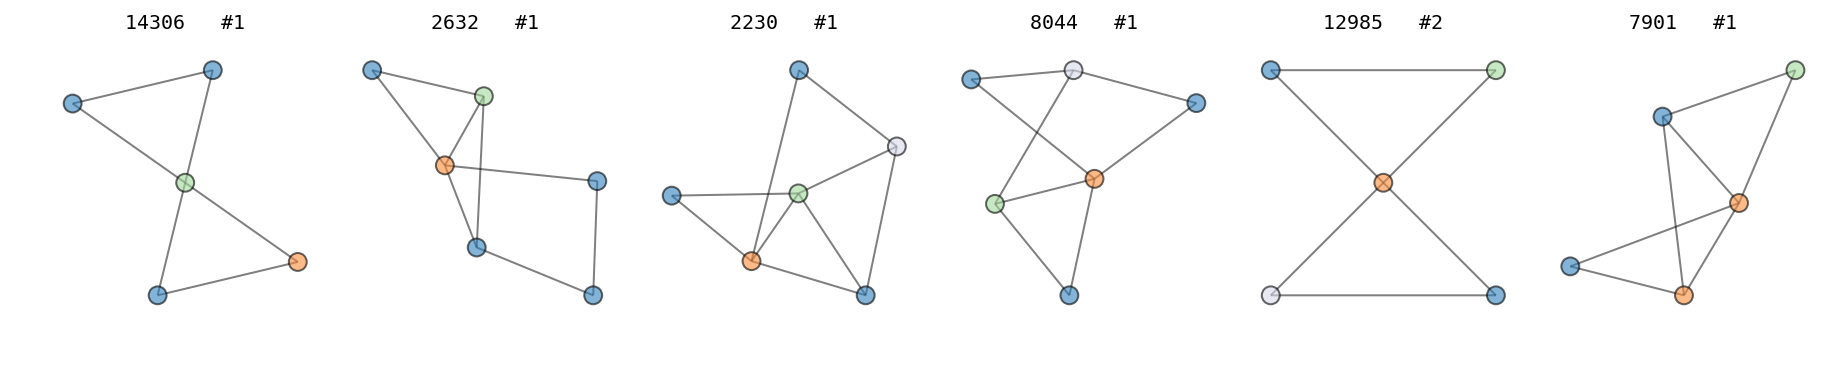

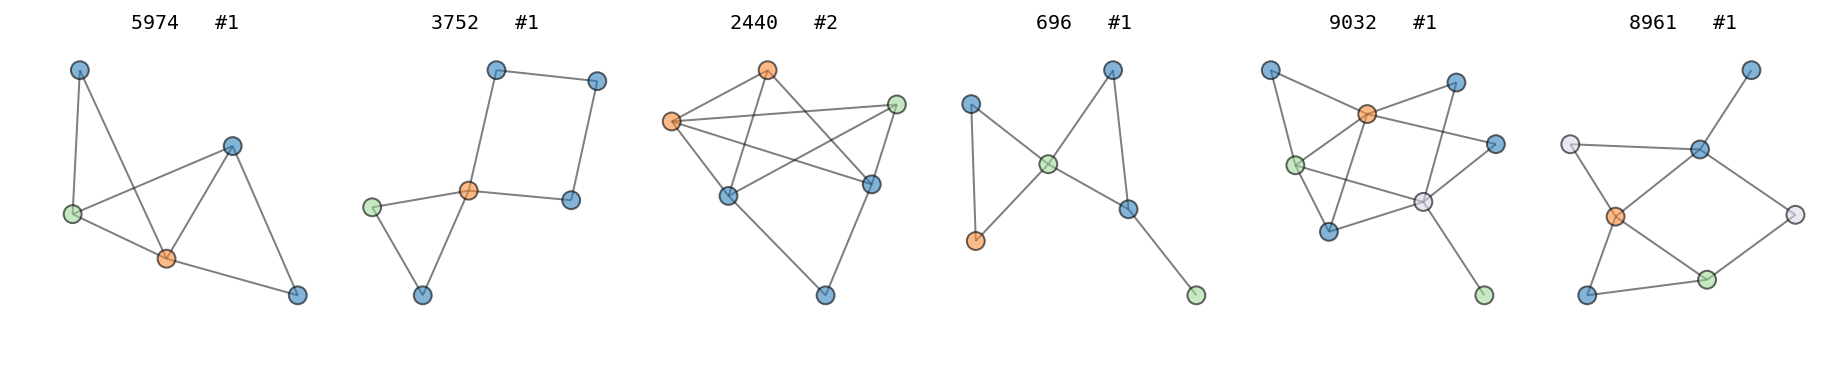

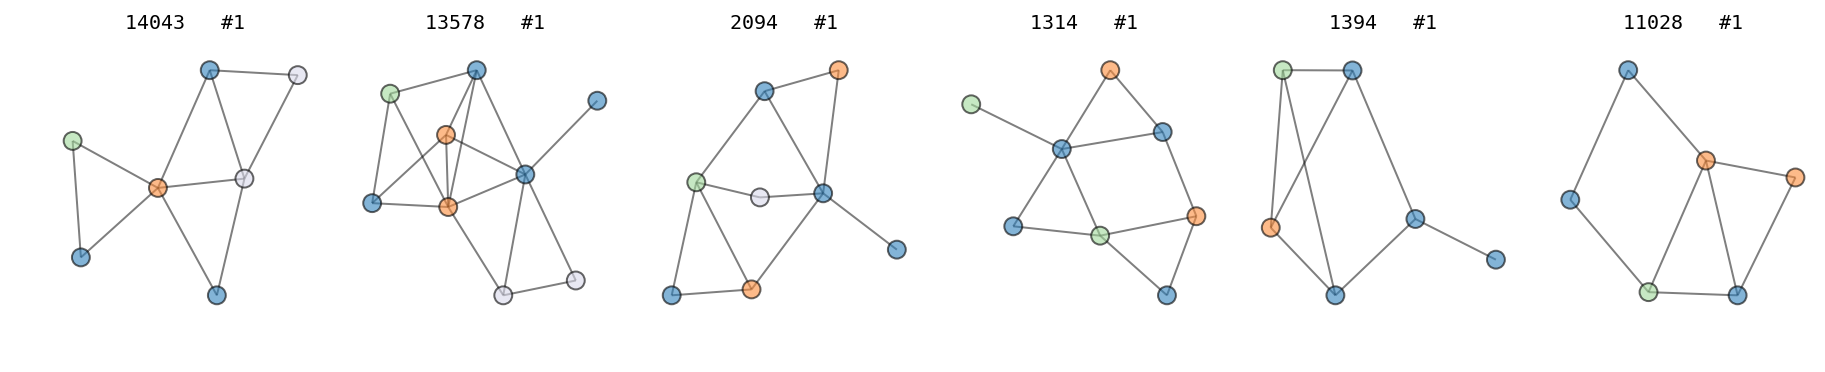

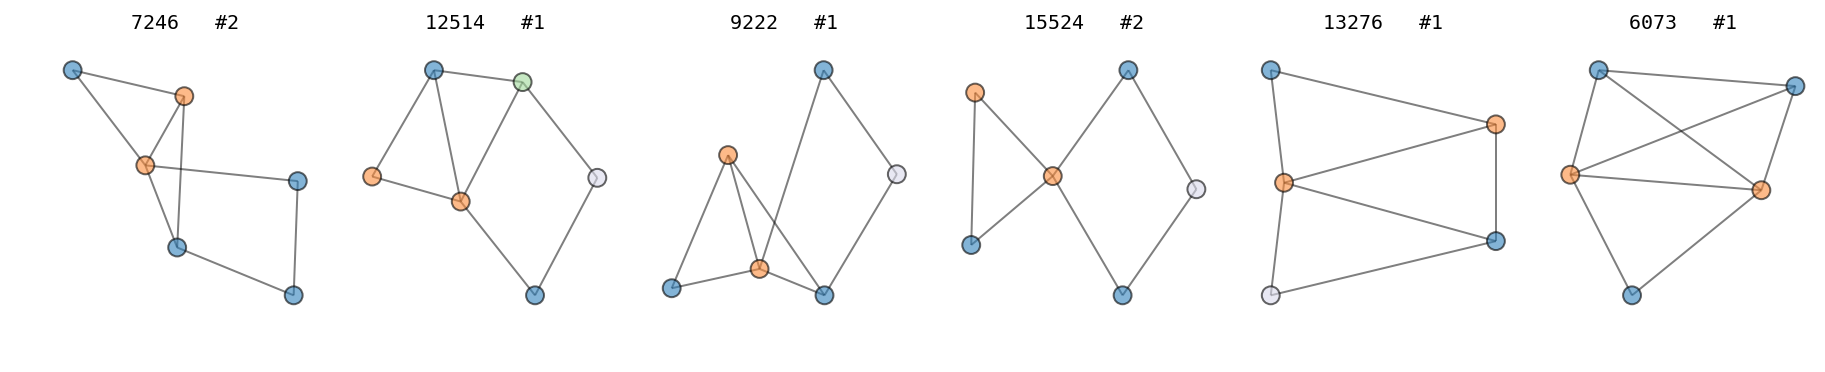

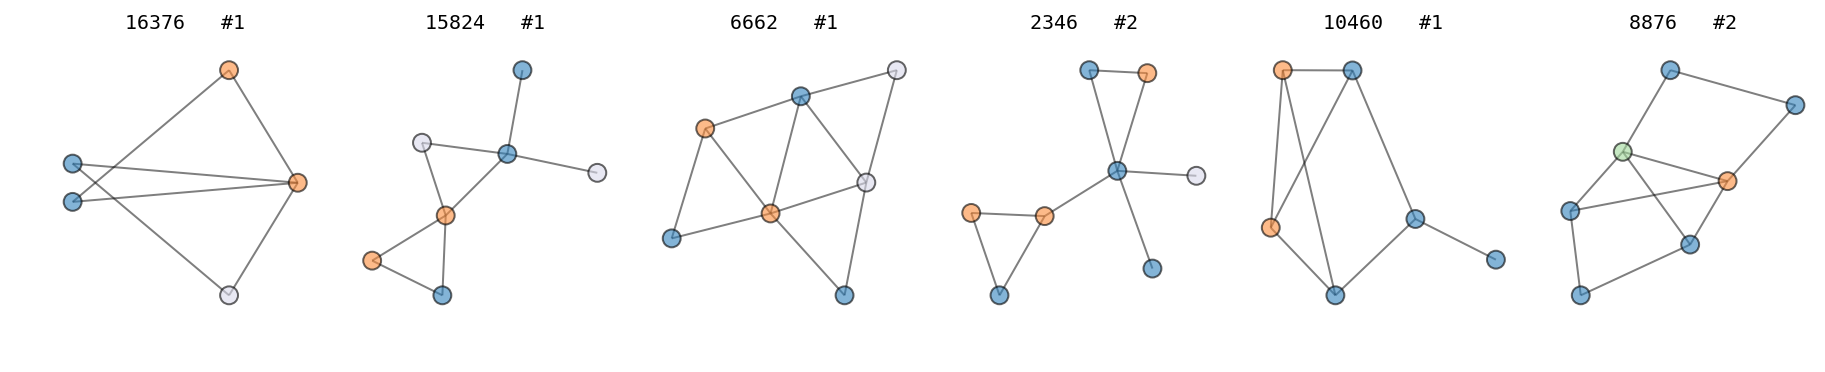

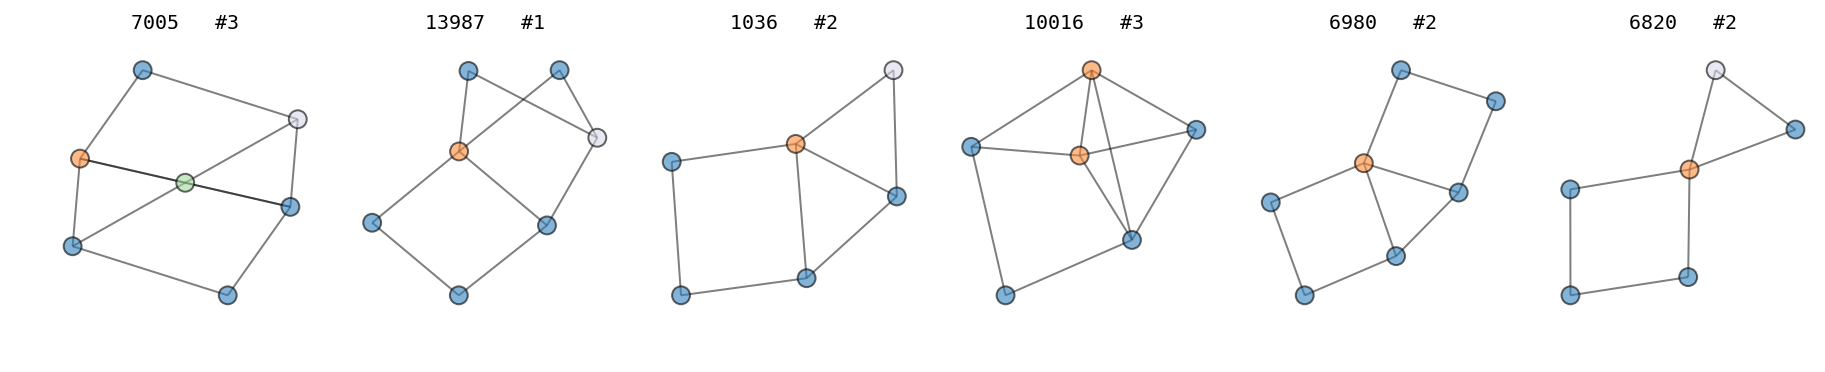

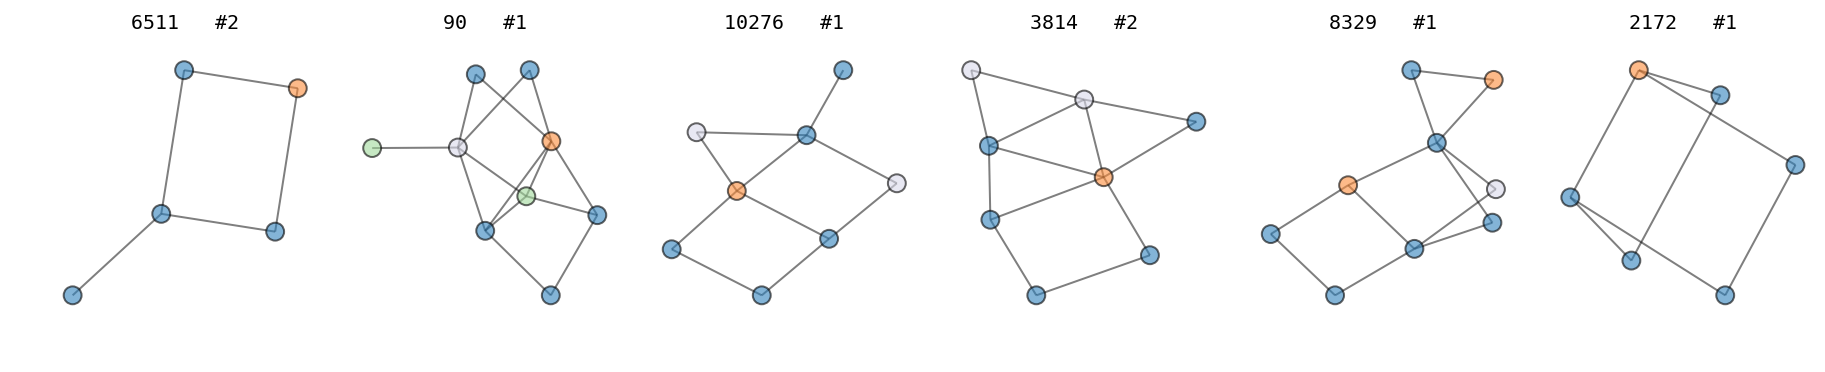

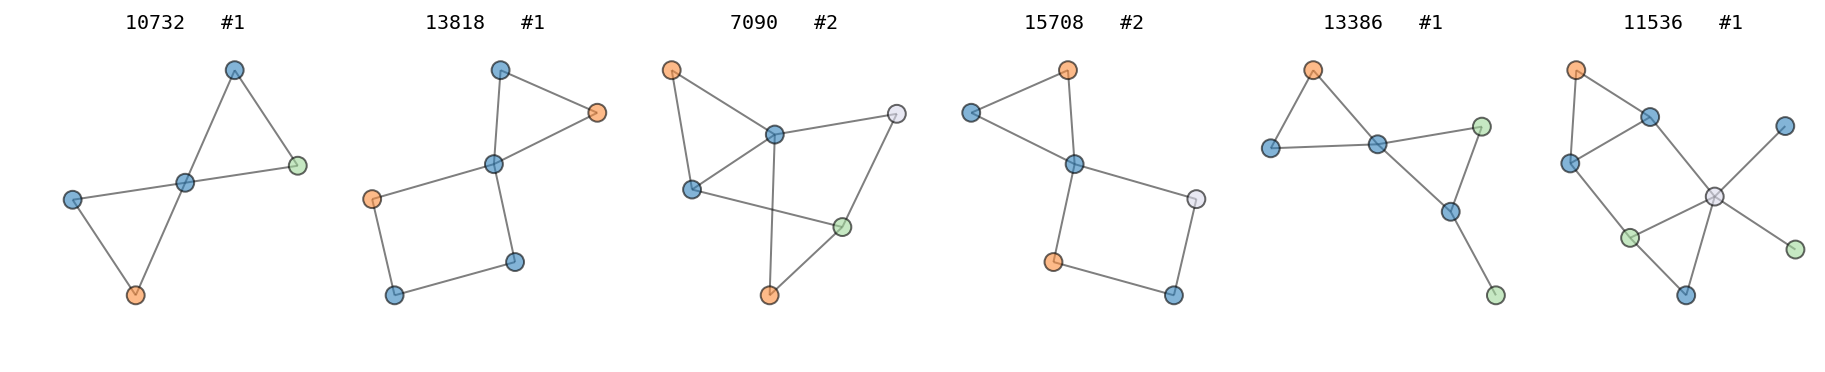

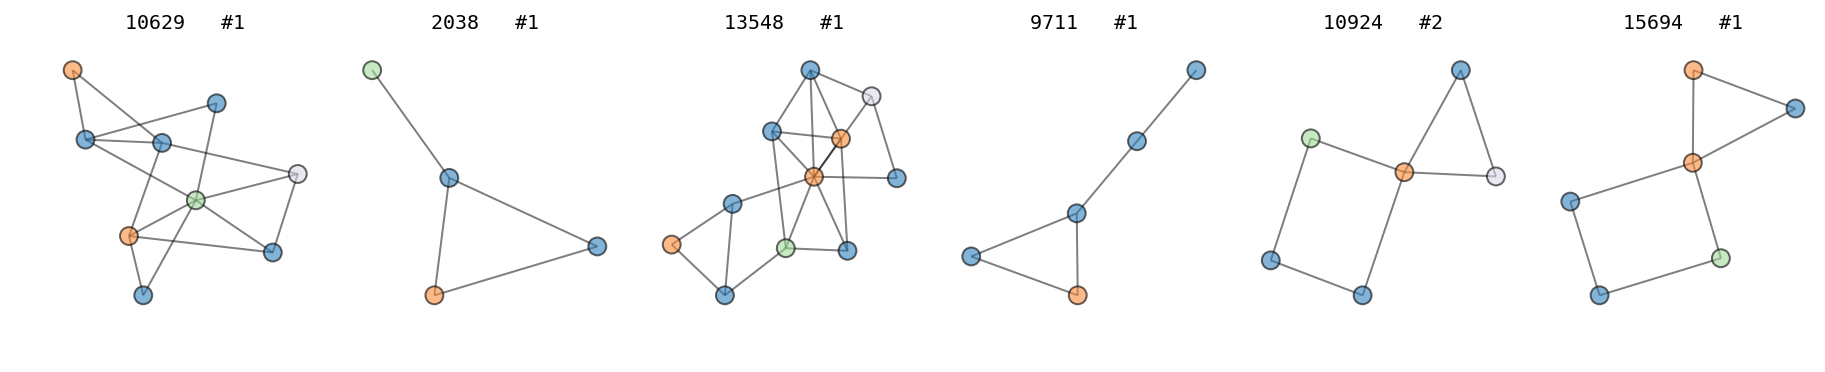

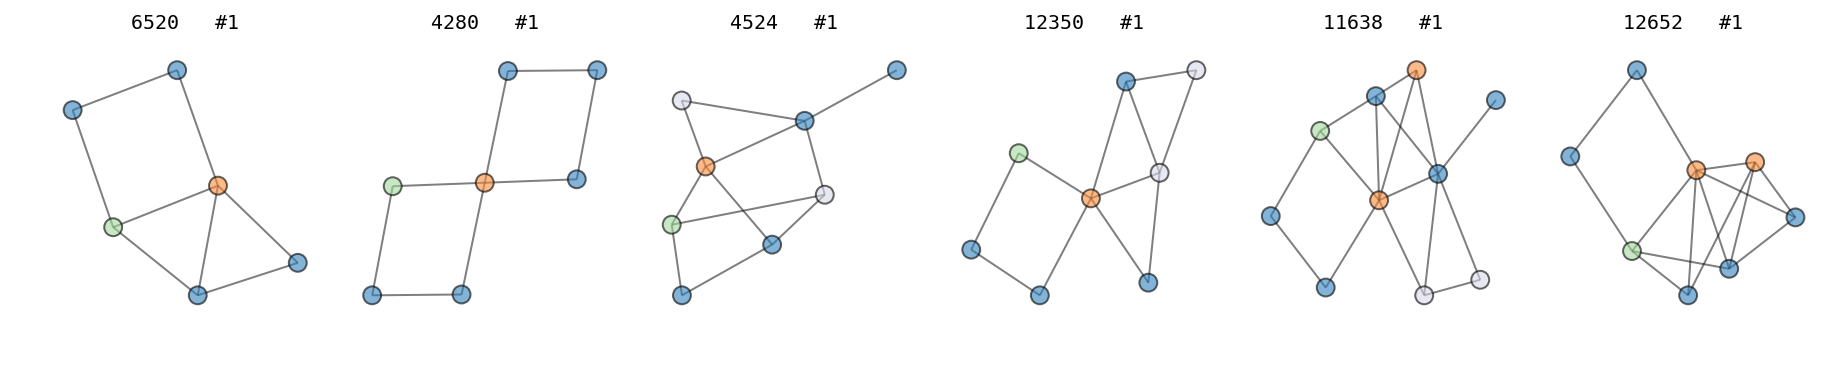

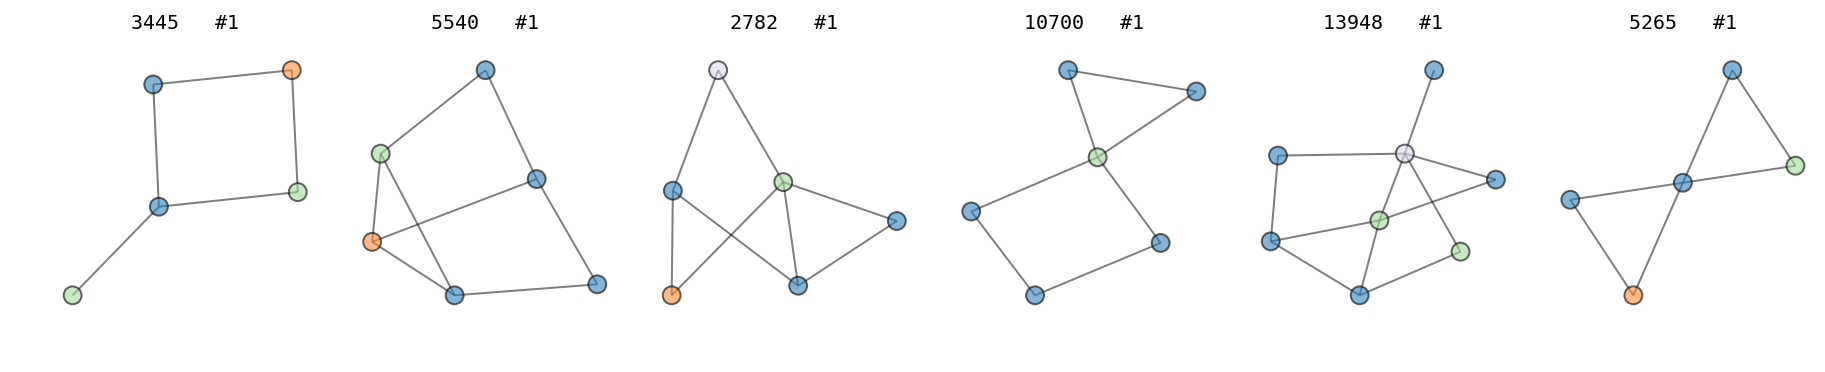

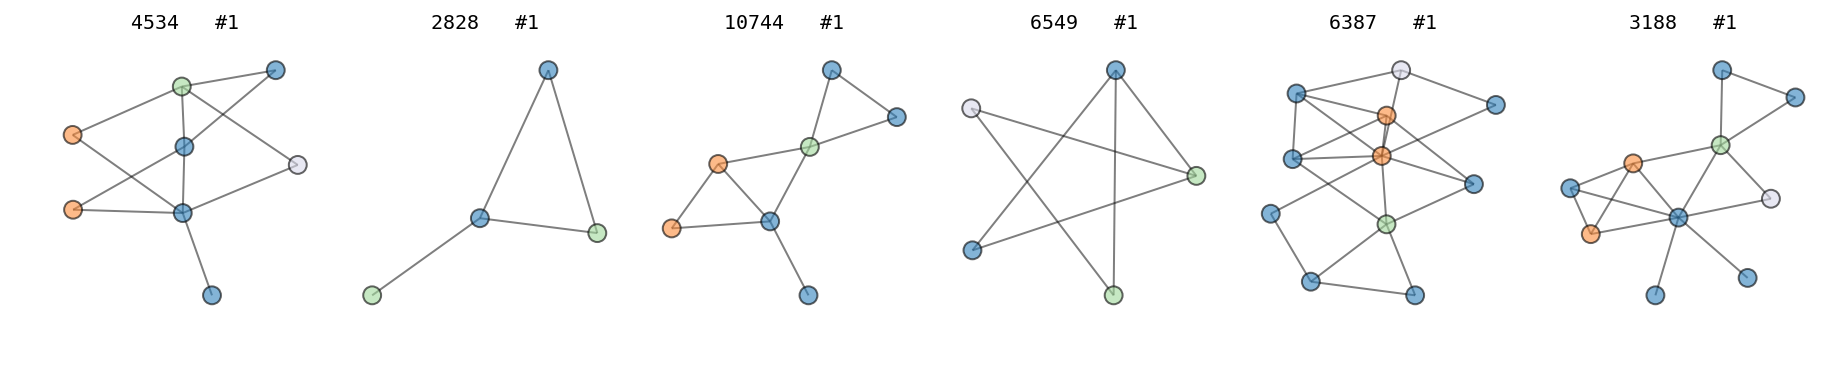

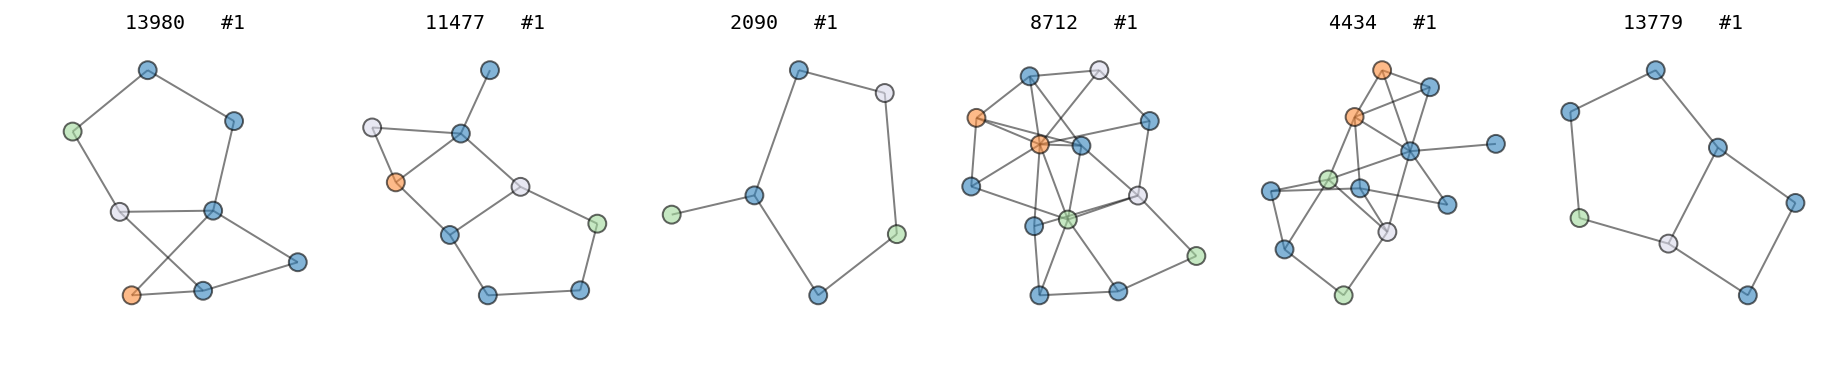

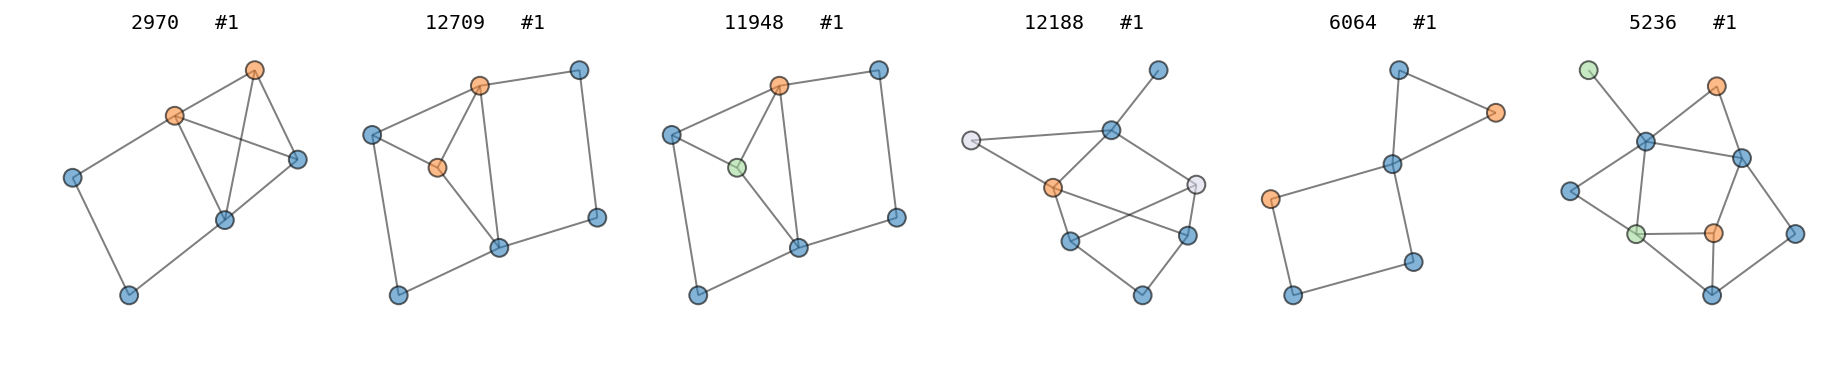

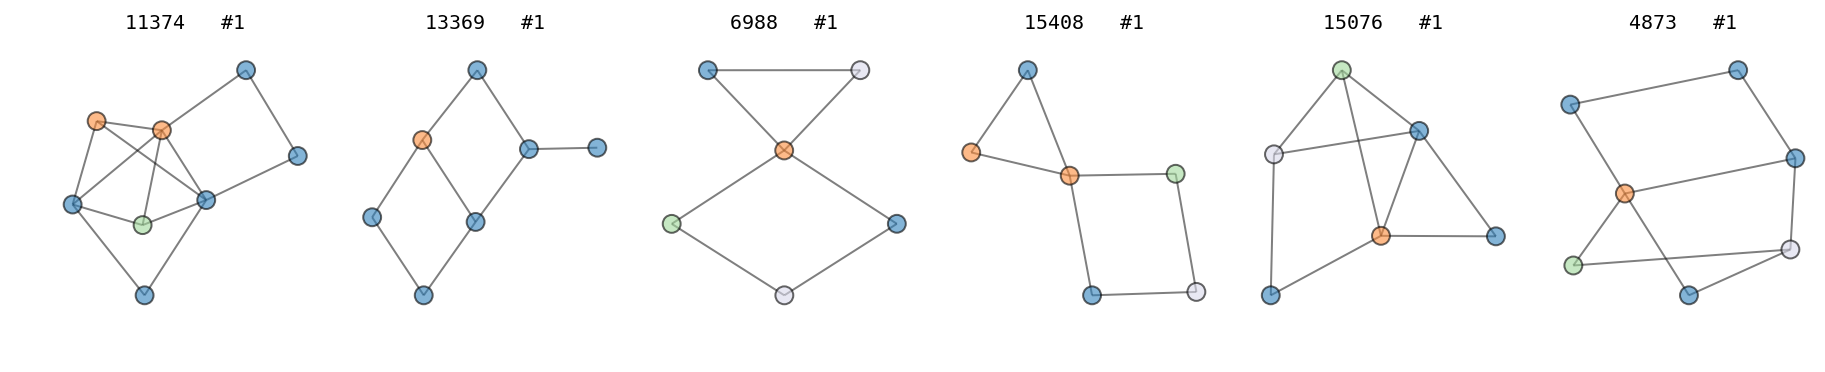

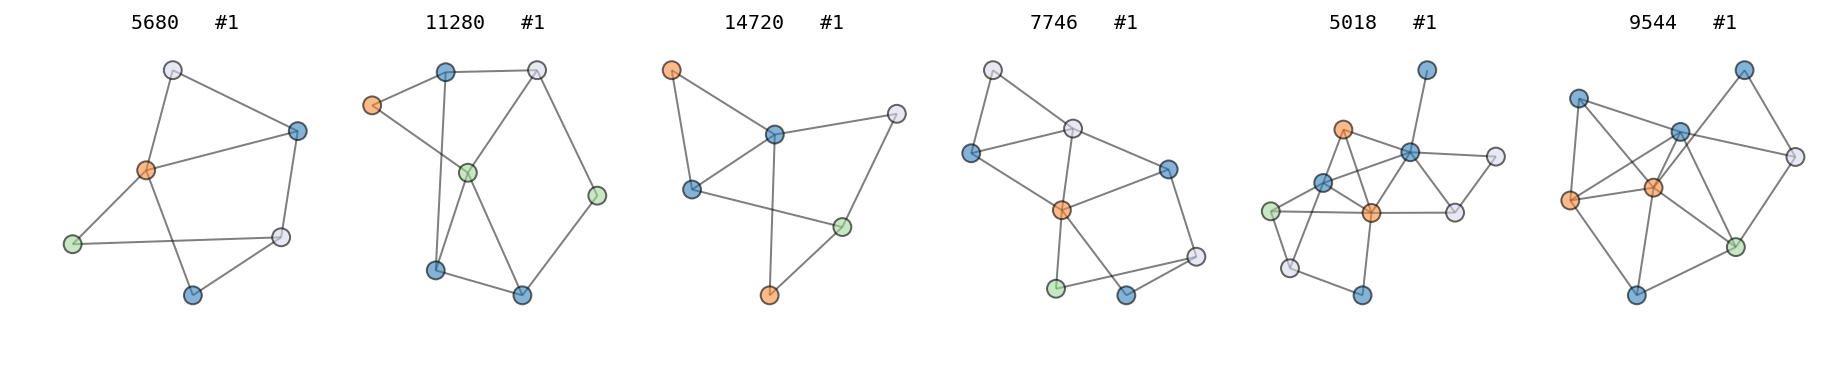

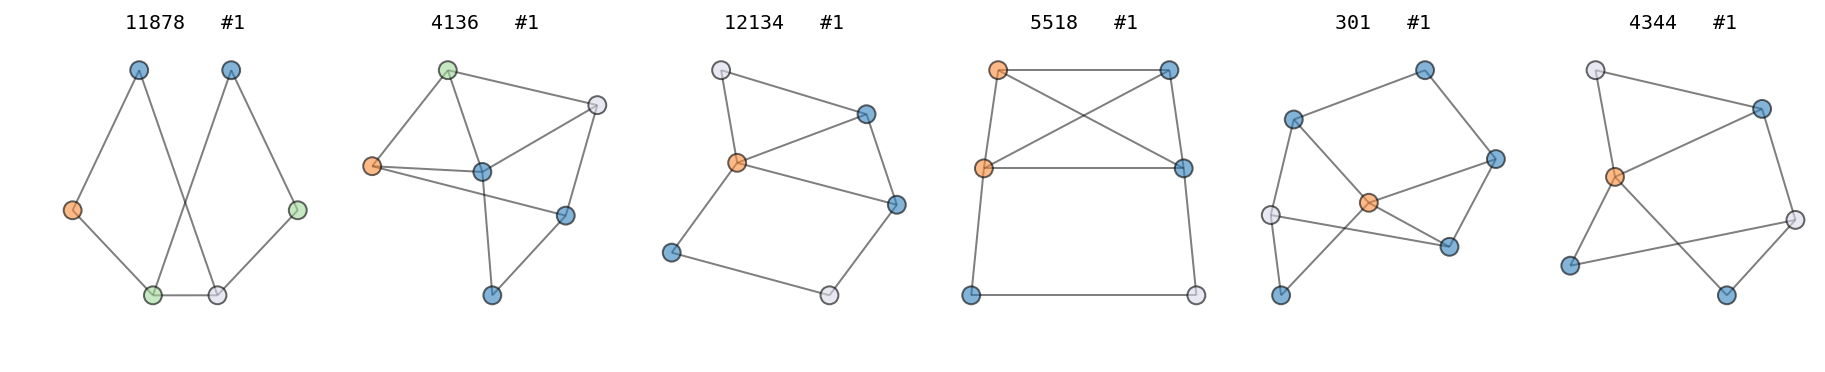

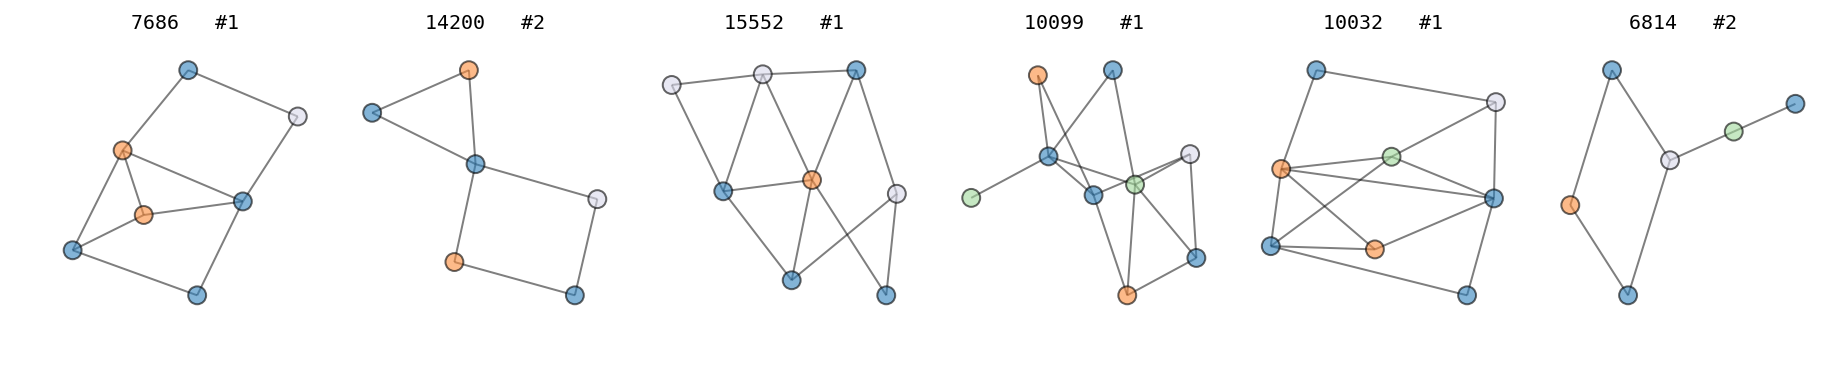

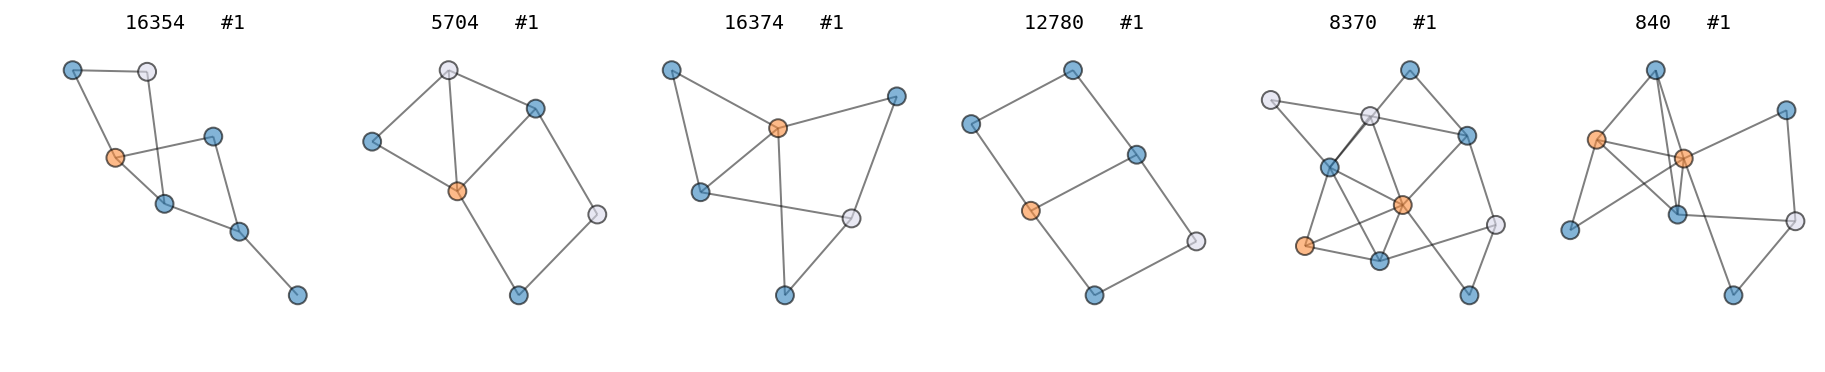

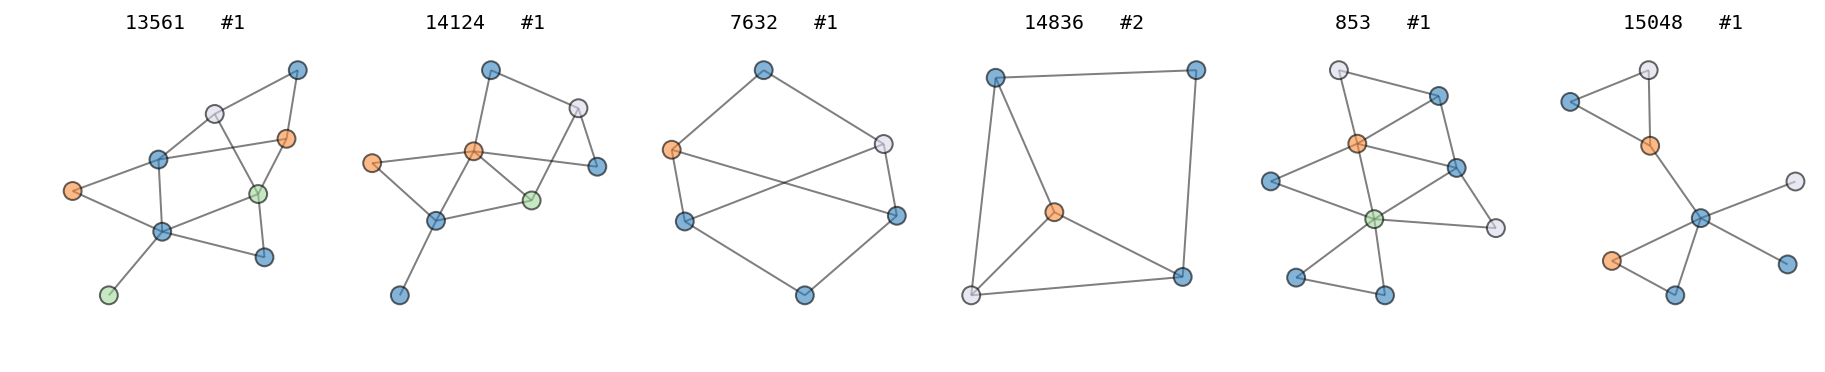

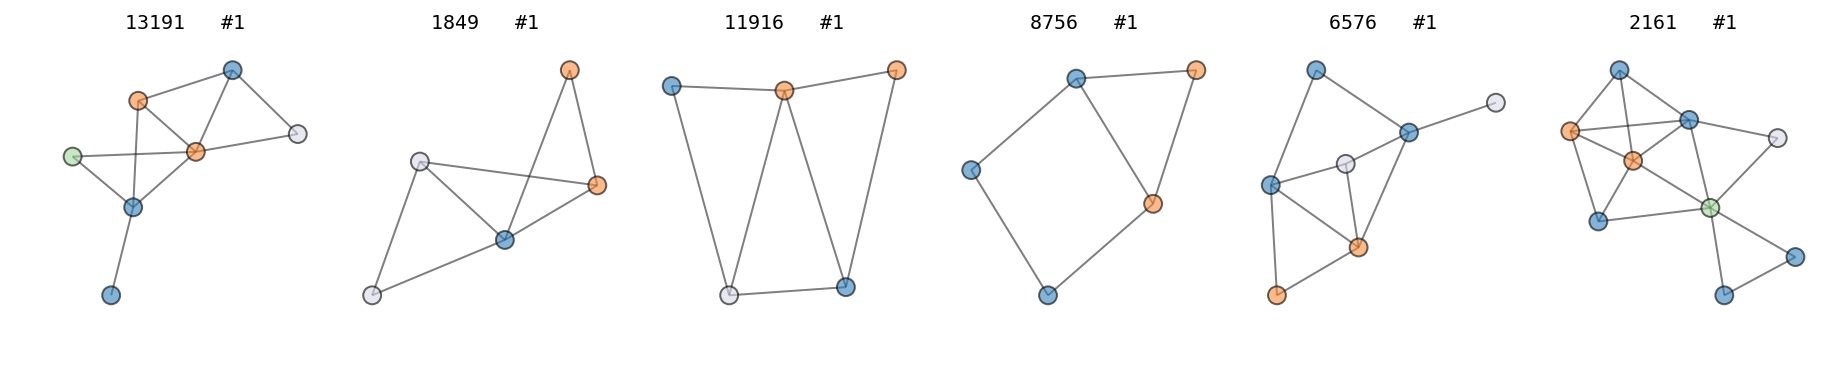

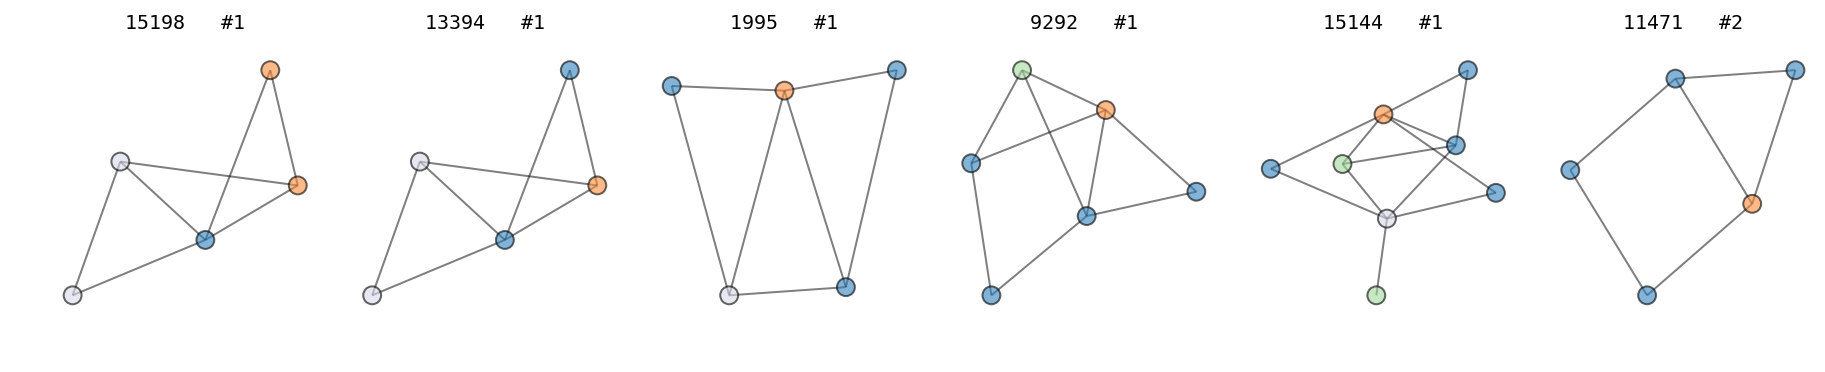

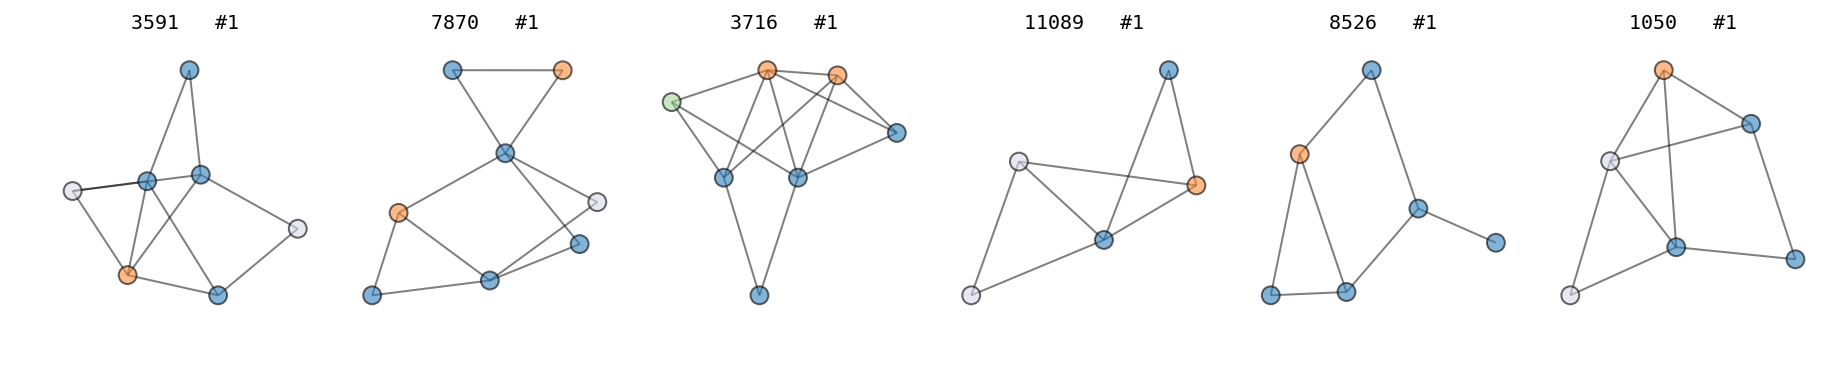

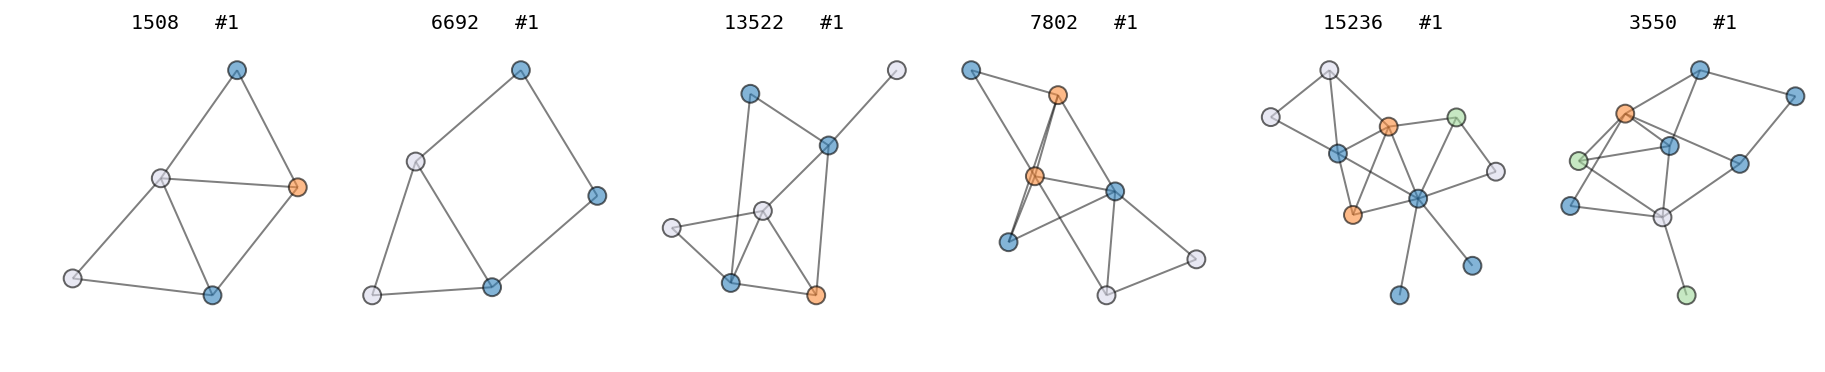

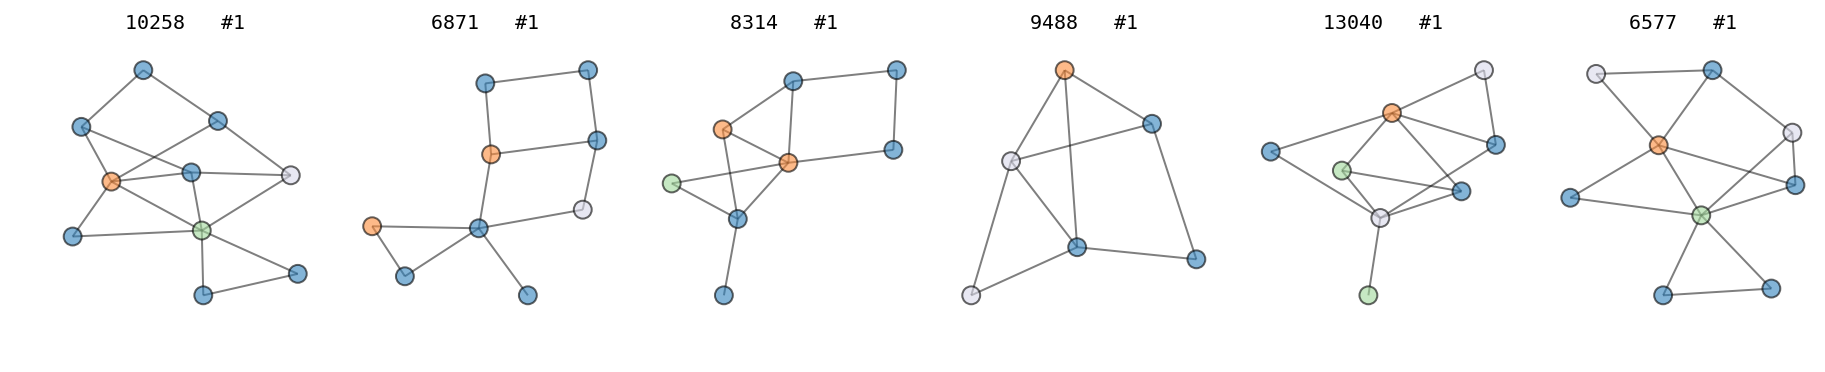

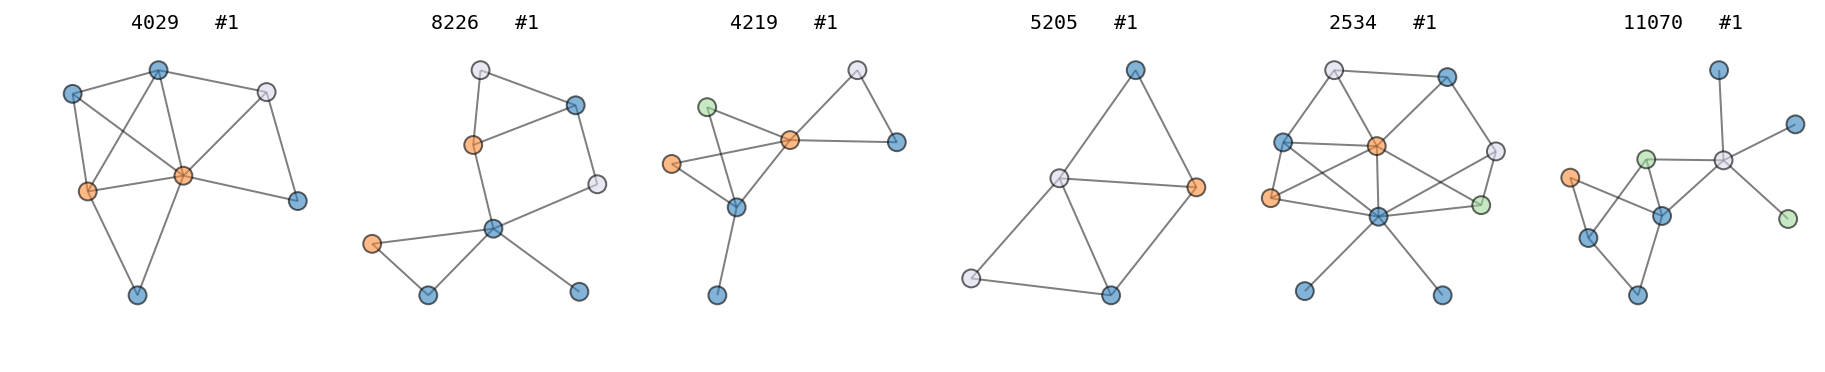

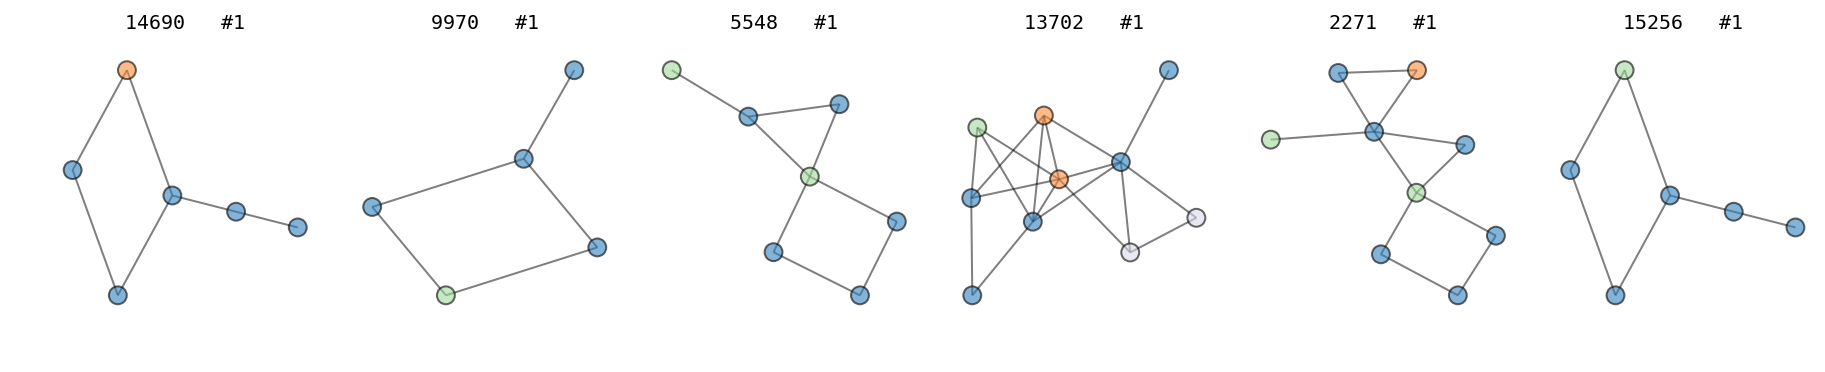

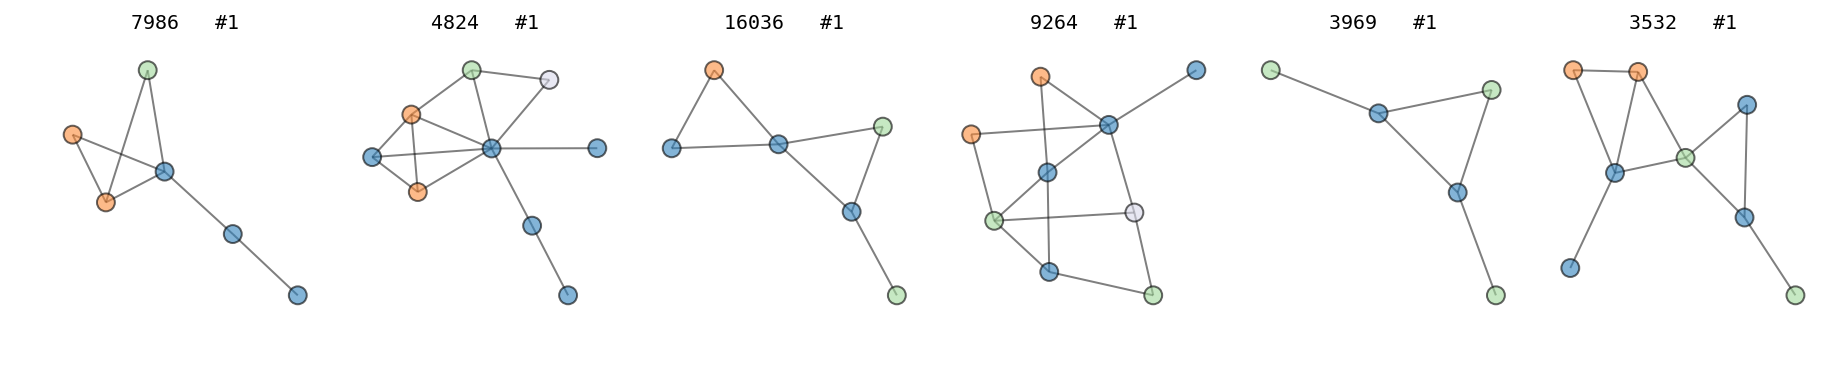

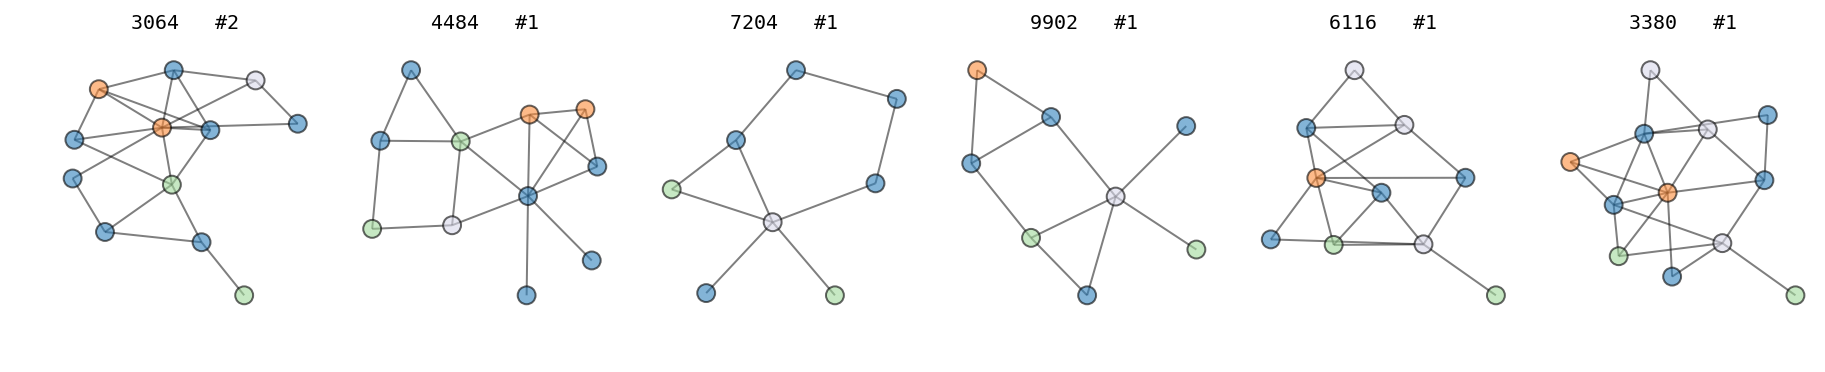

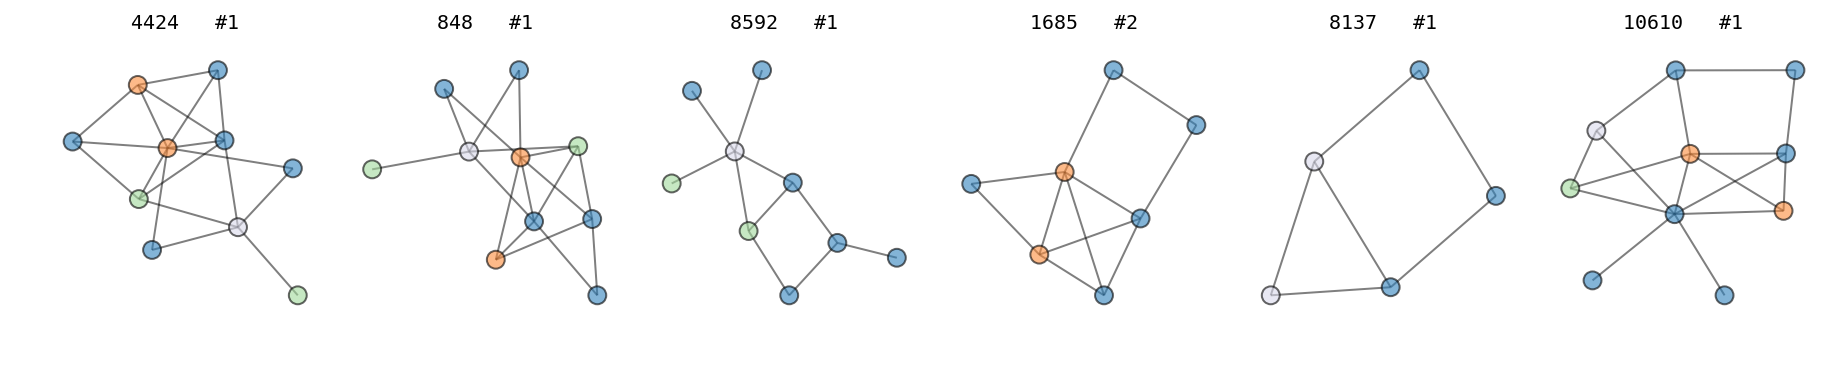

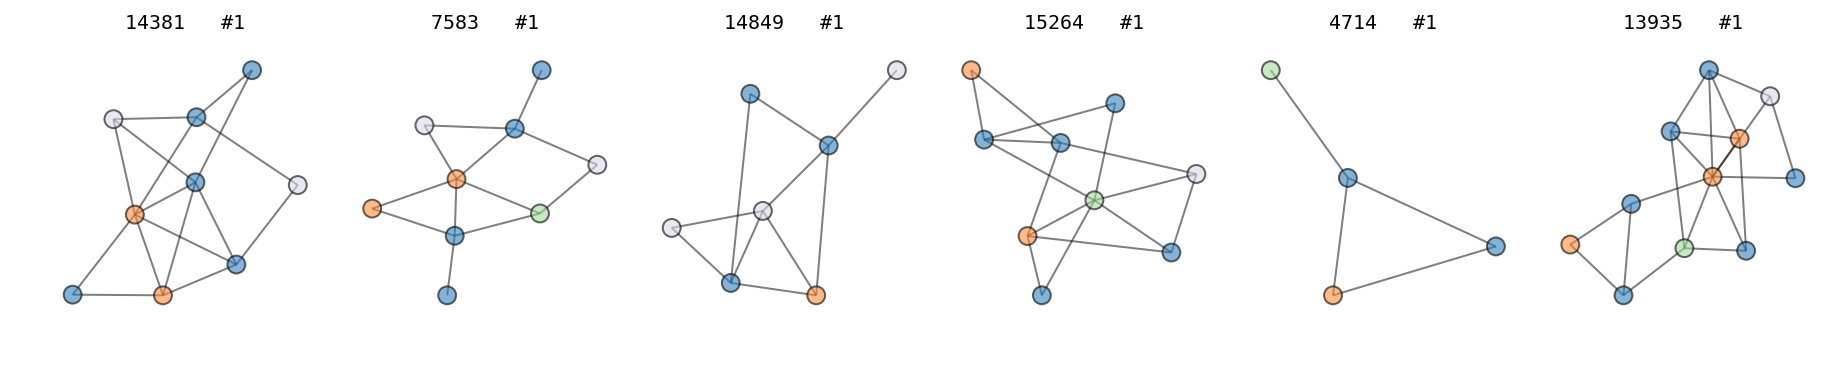

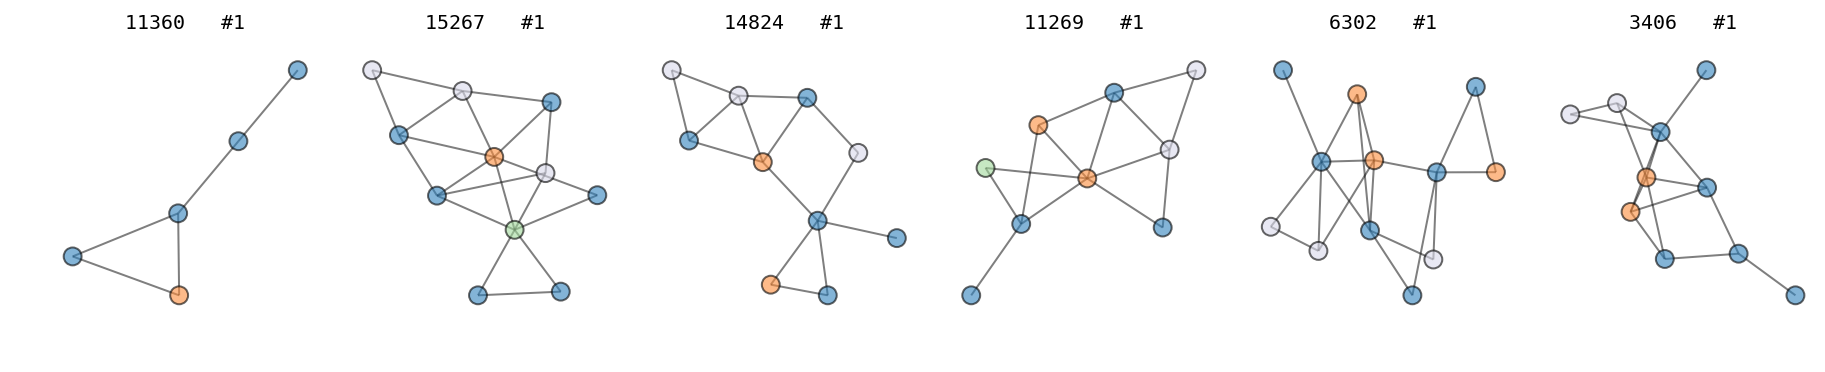

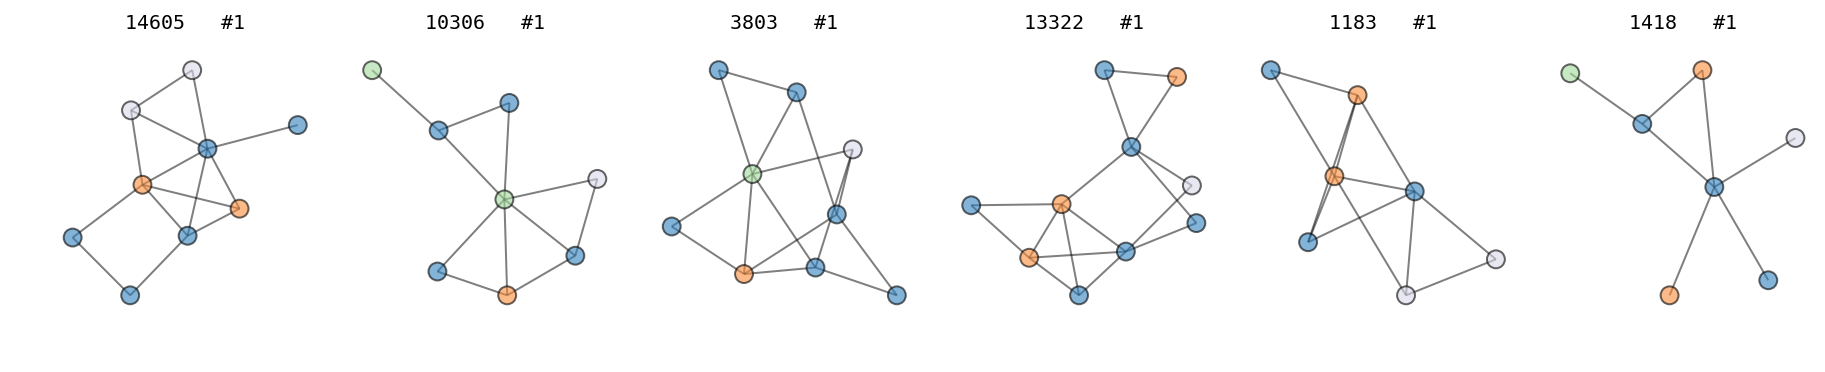

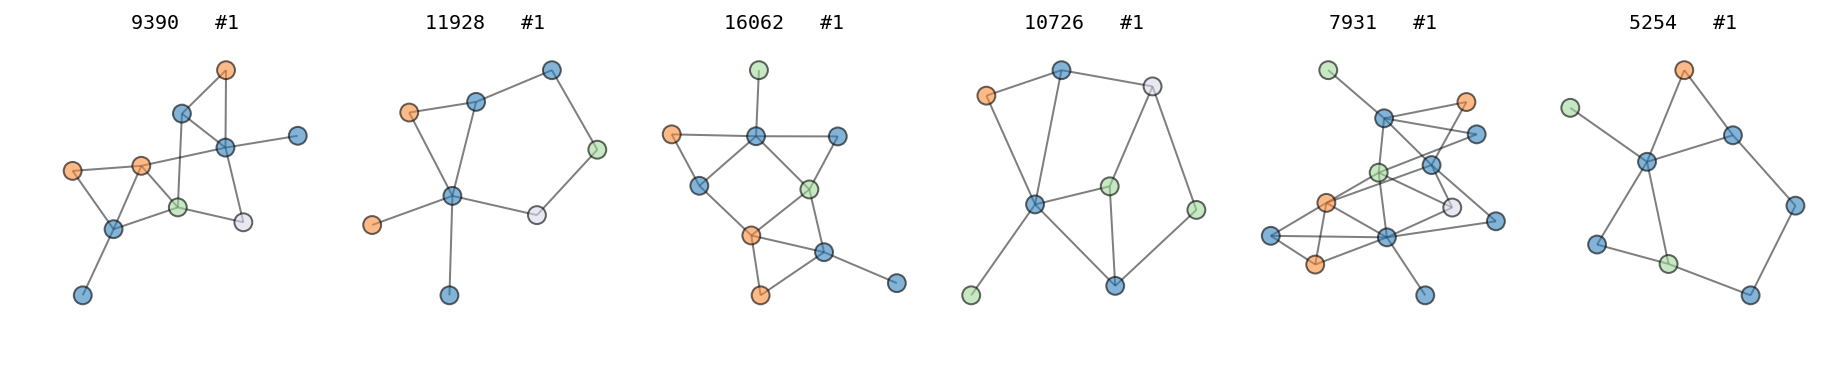

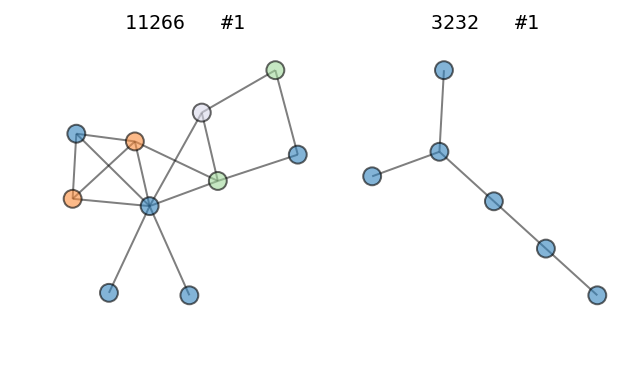

In [39]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_node_join)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


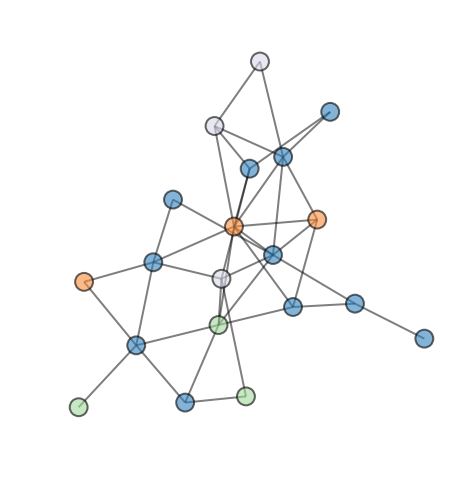

32 unique components in 32 fragments


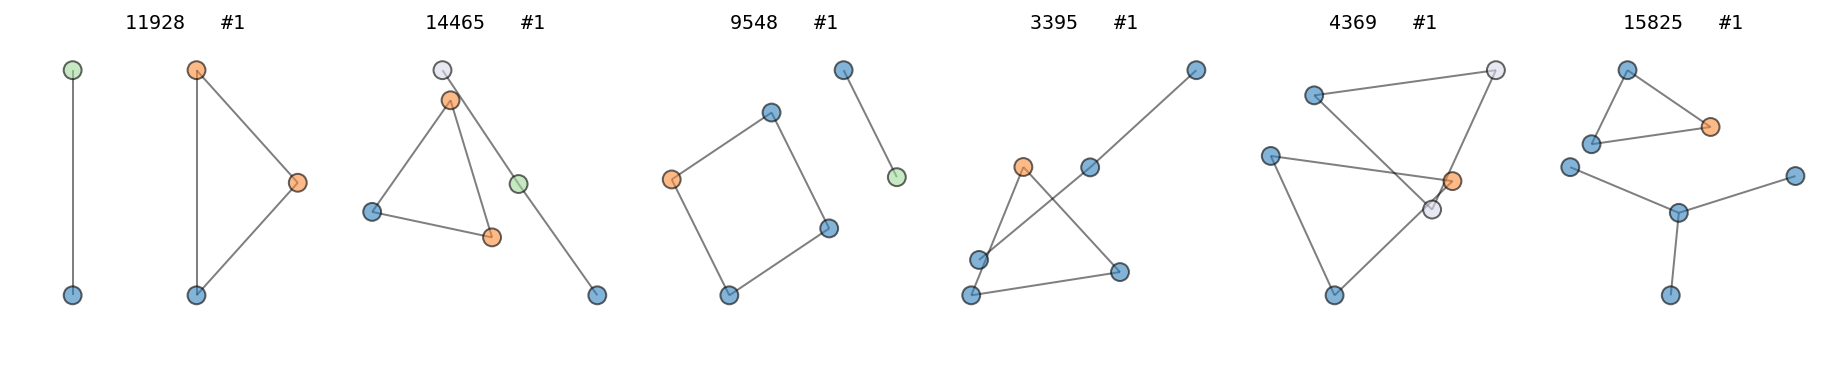

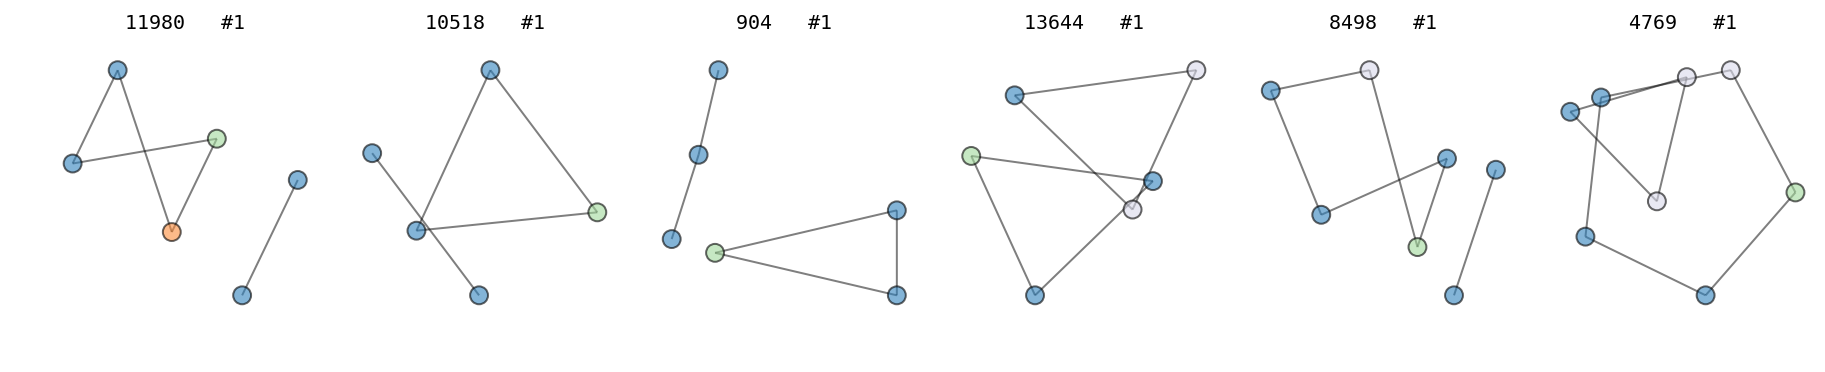

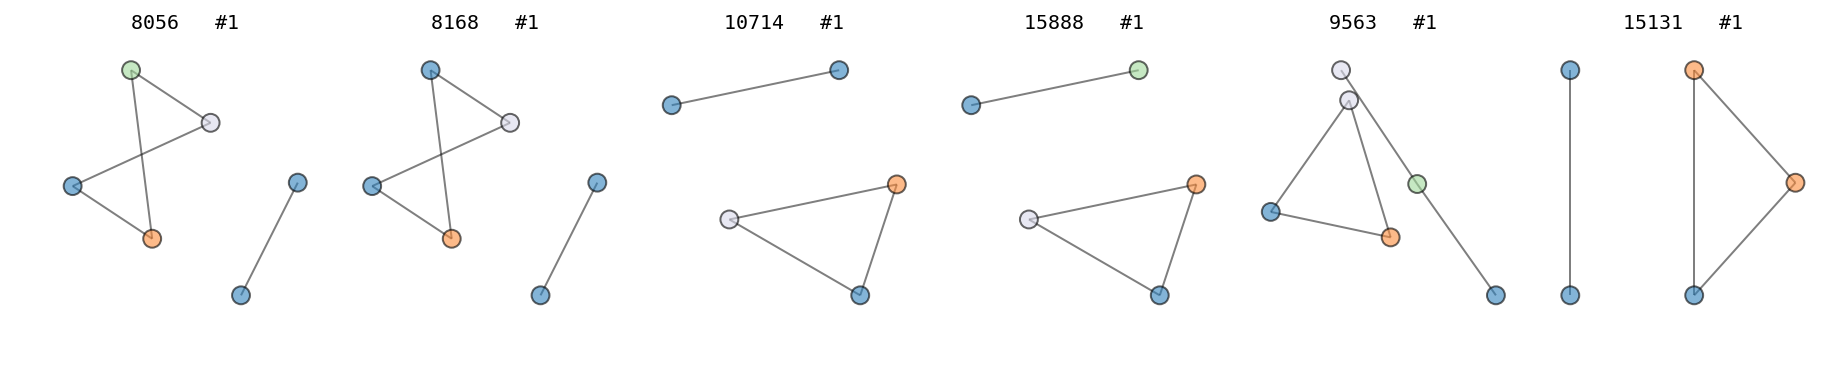

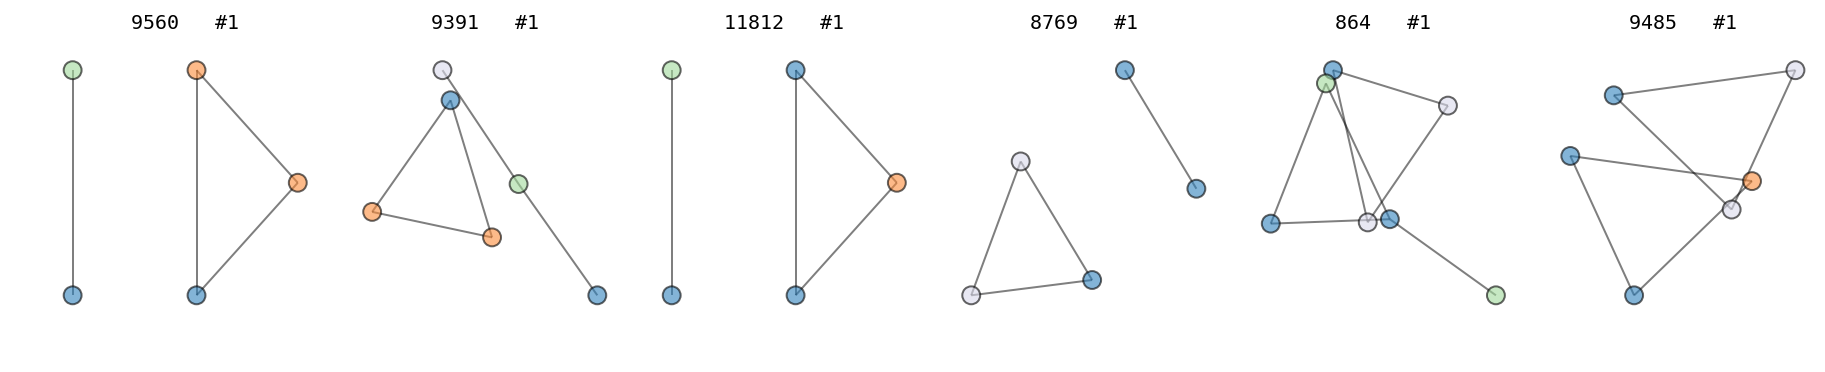

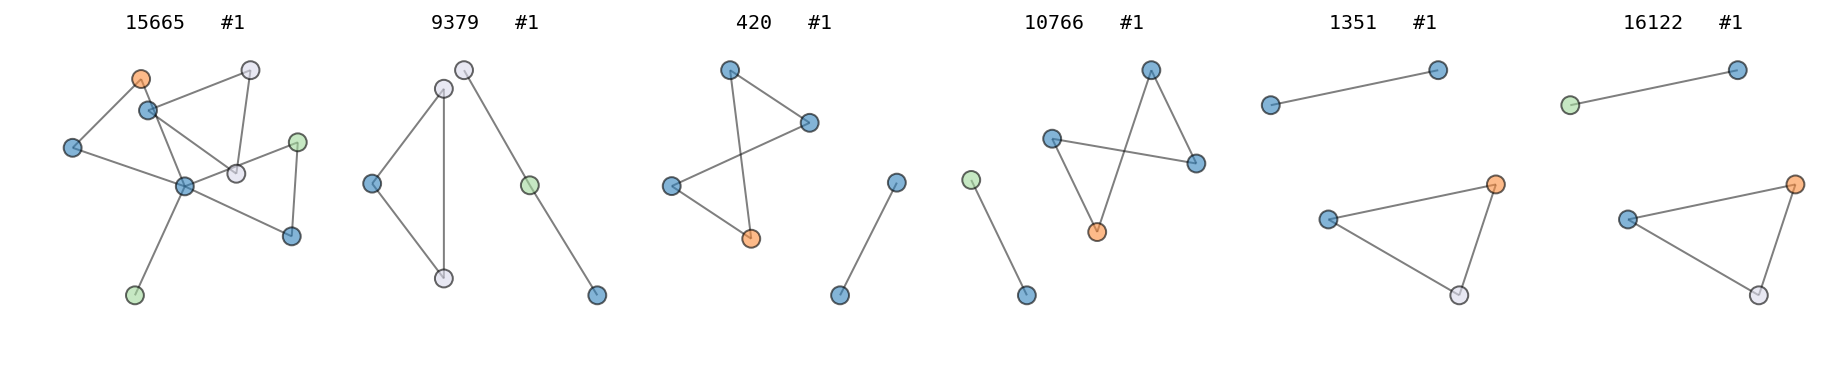

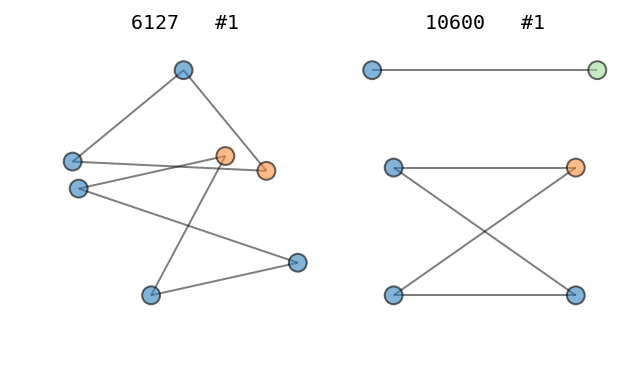

In [40]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_pair_binary(distance=2), compose_function=decompose_identity)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


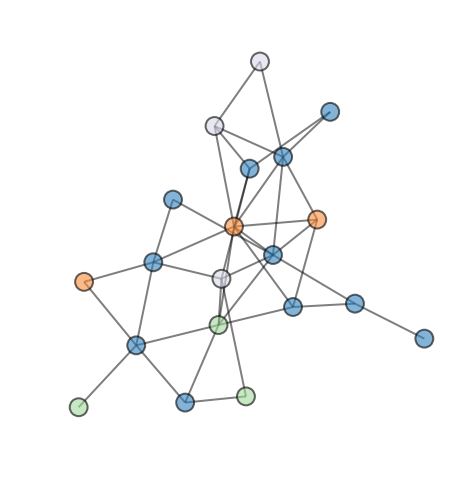

128 unique components in 377 fragments


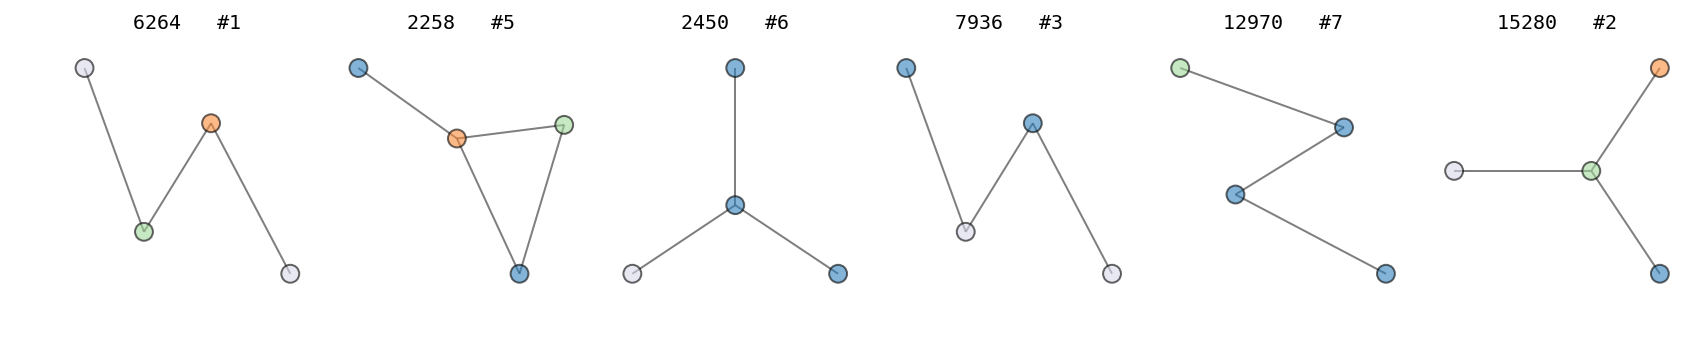

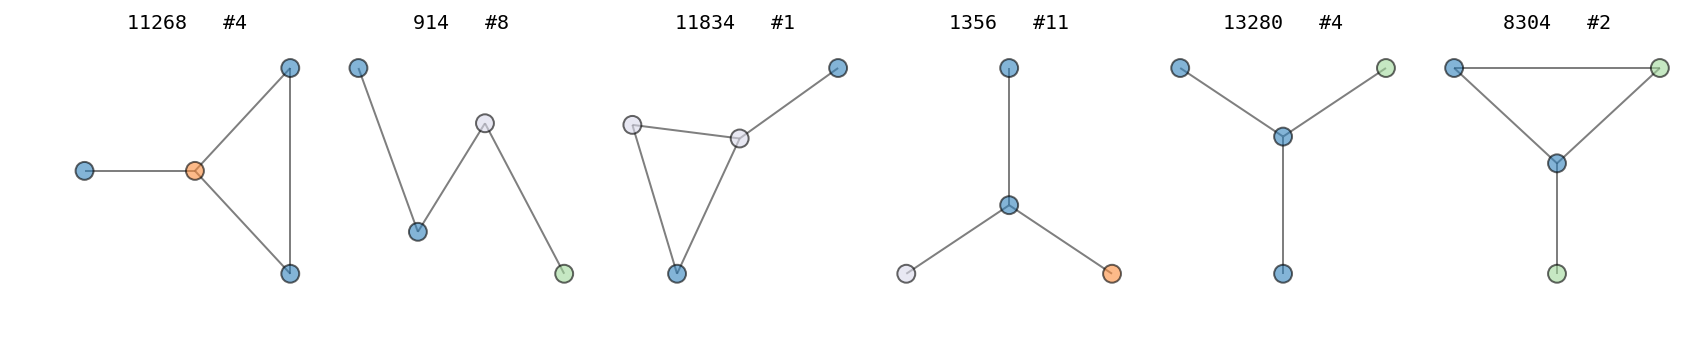

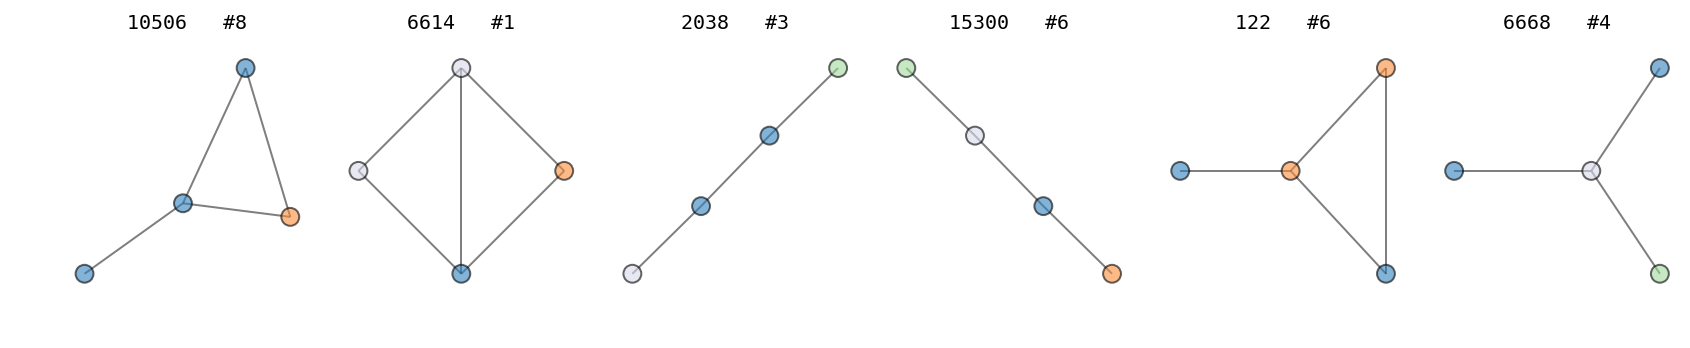

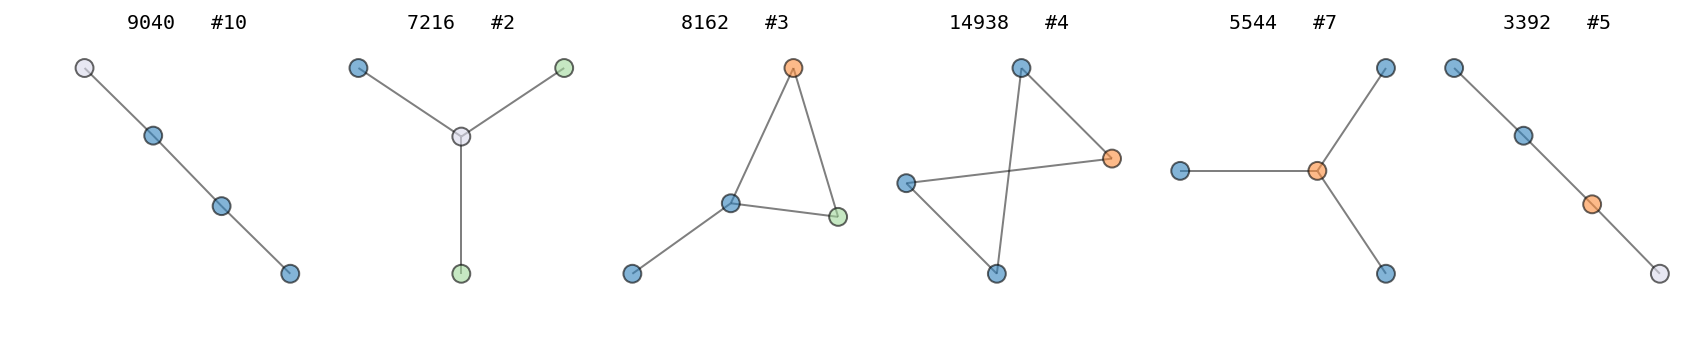

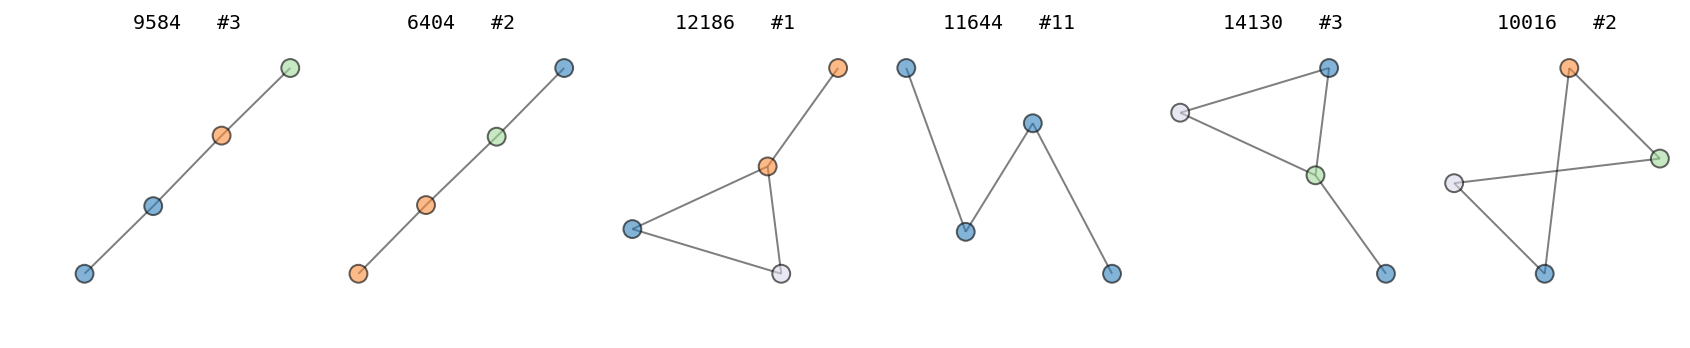

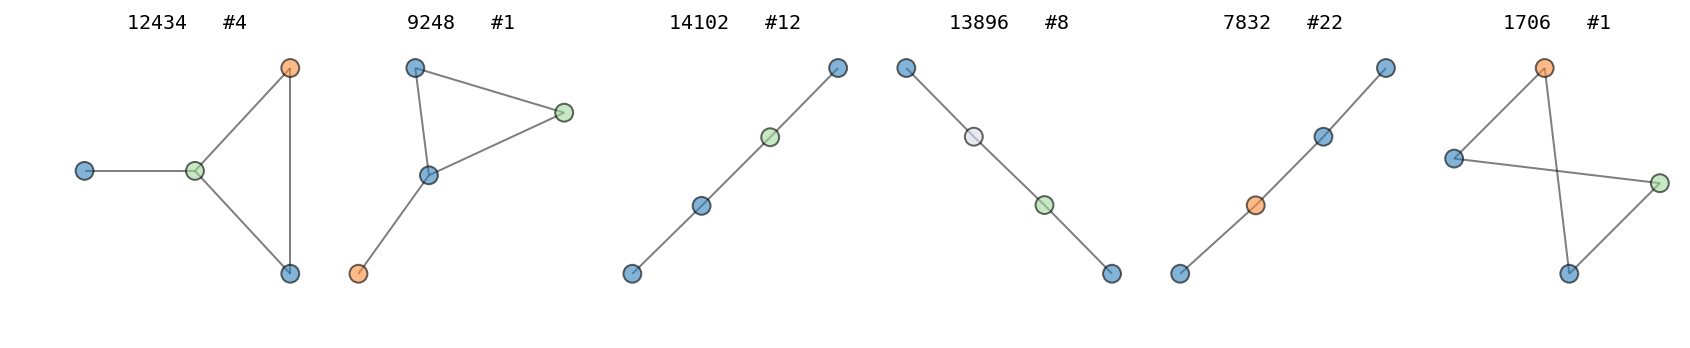

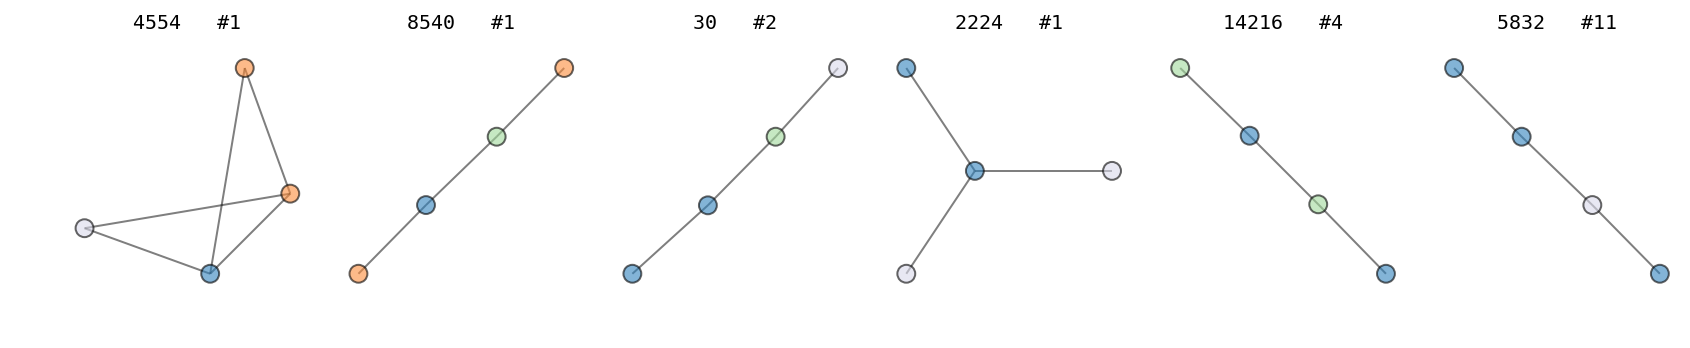

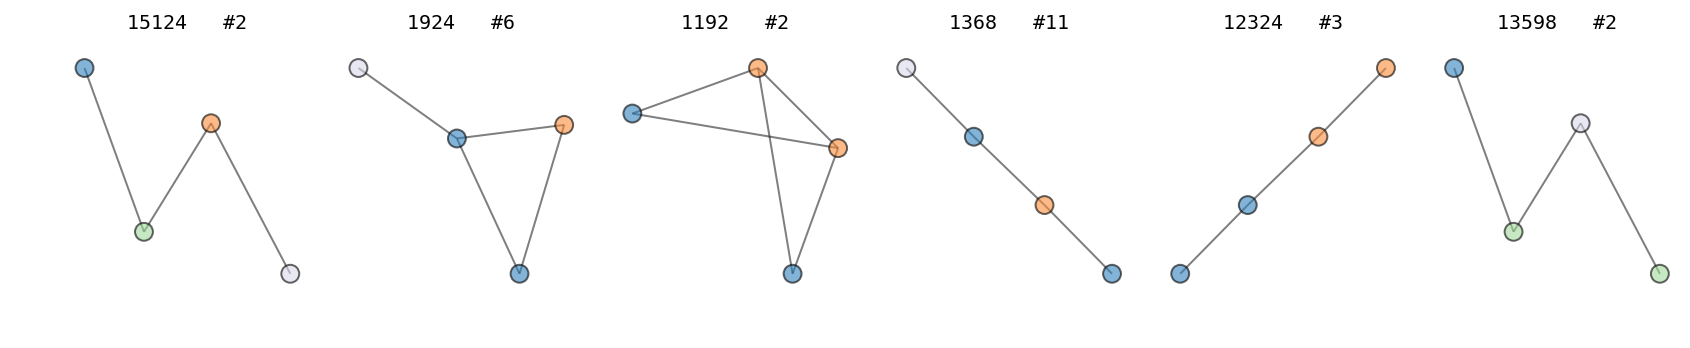

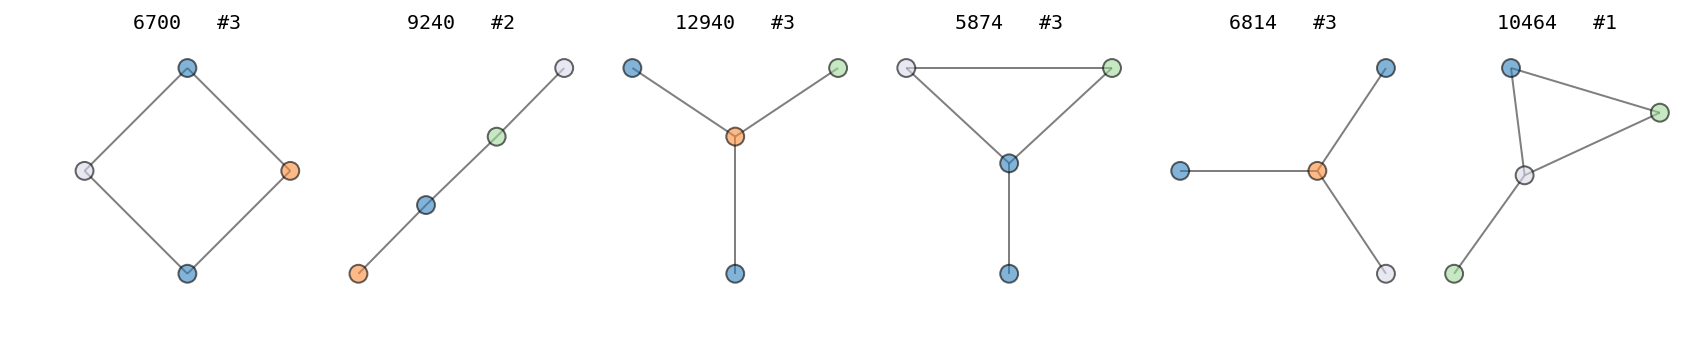

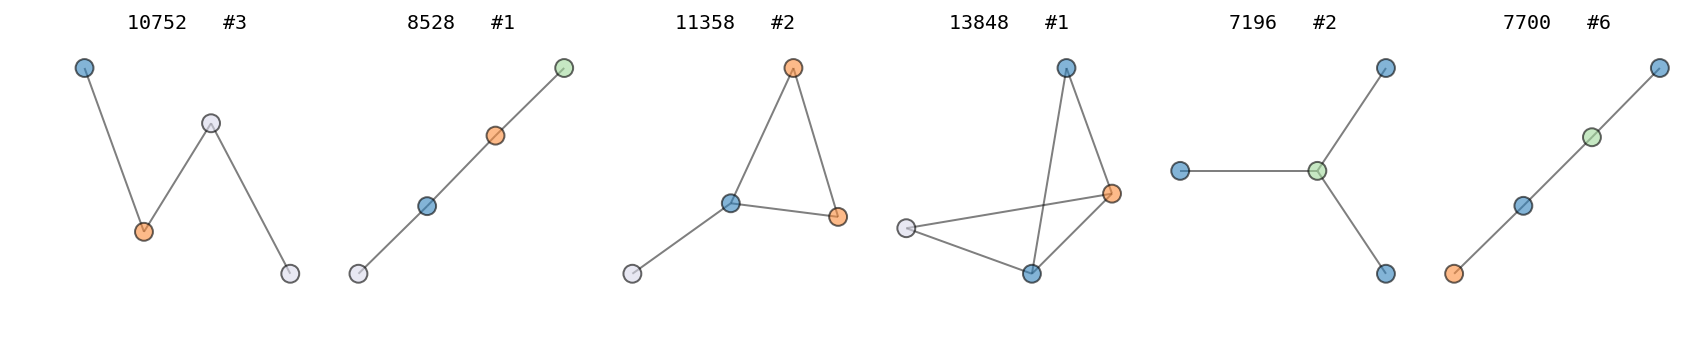

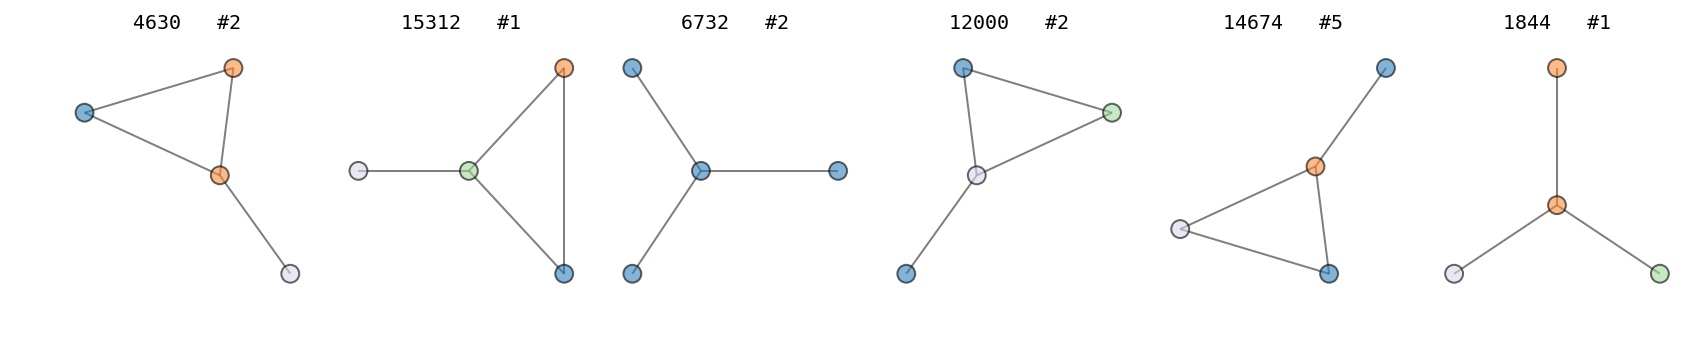

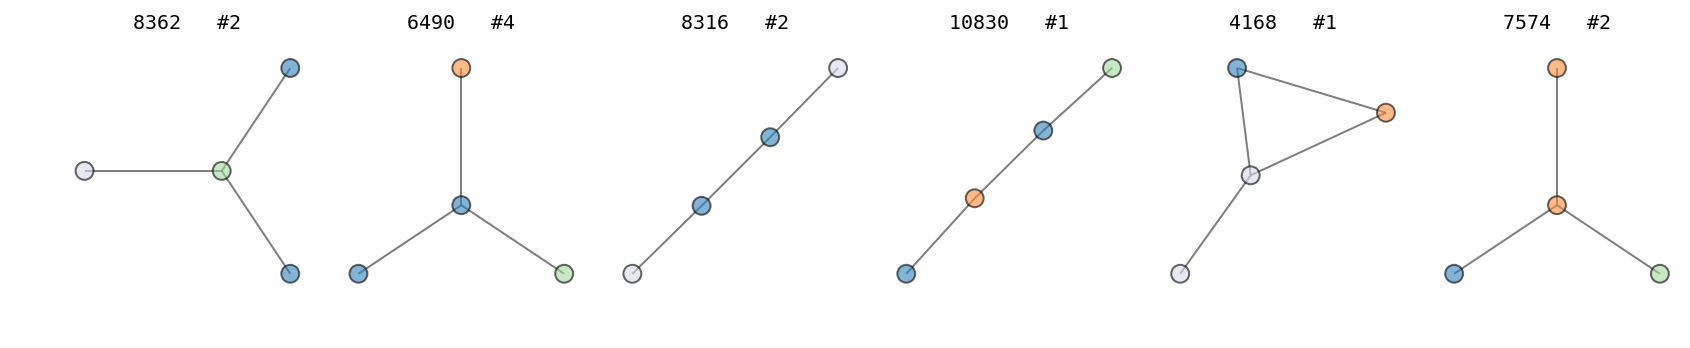

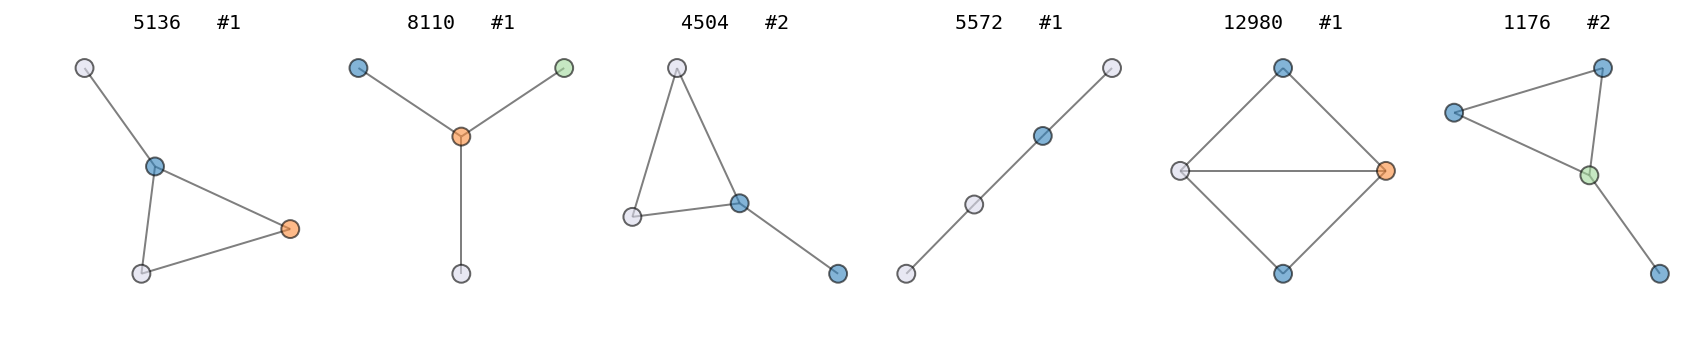

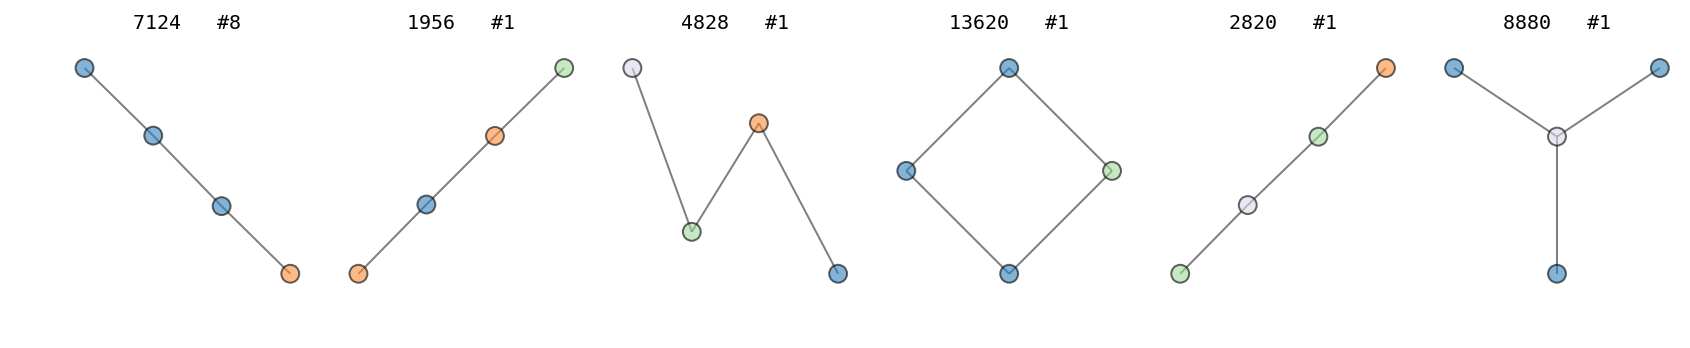

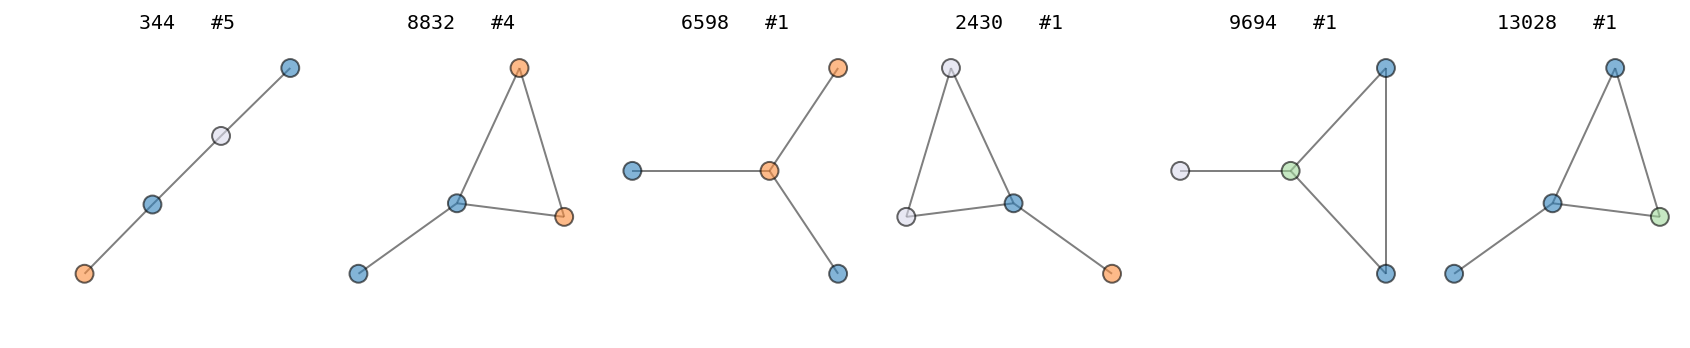

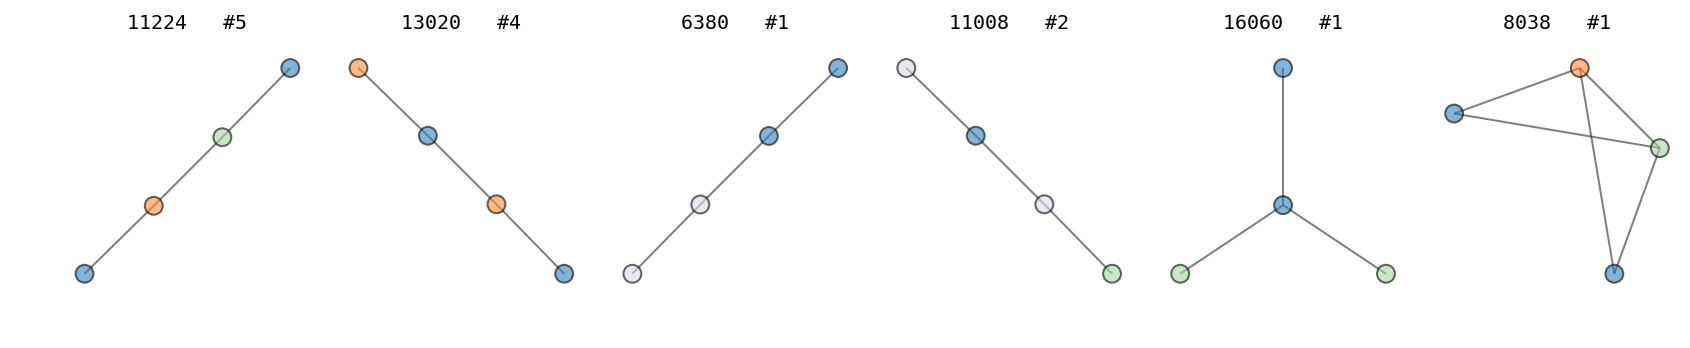

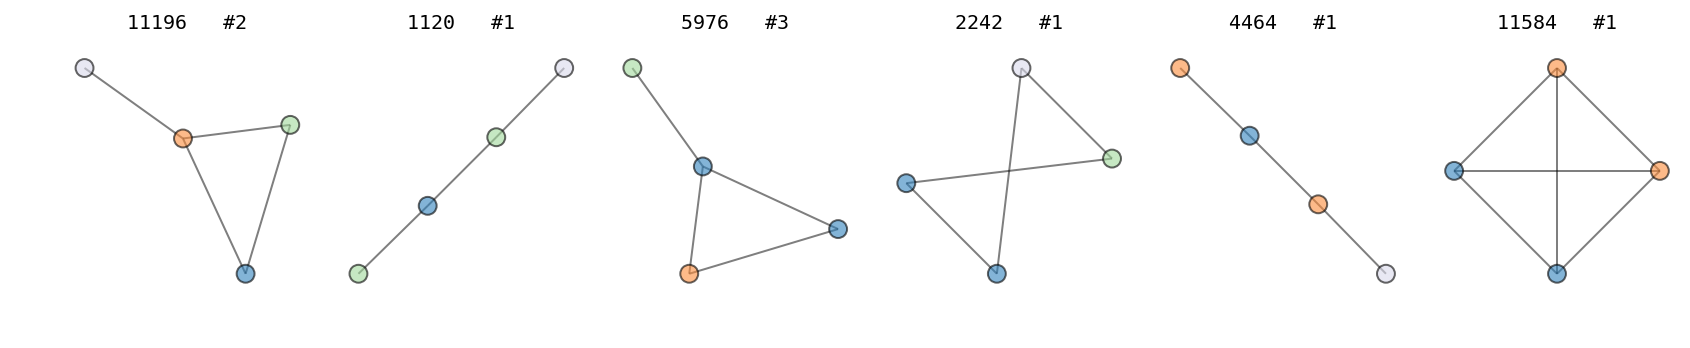

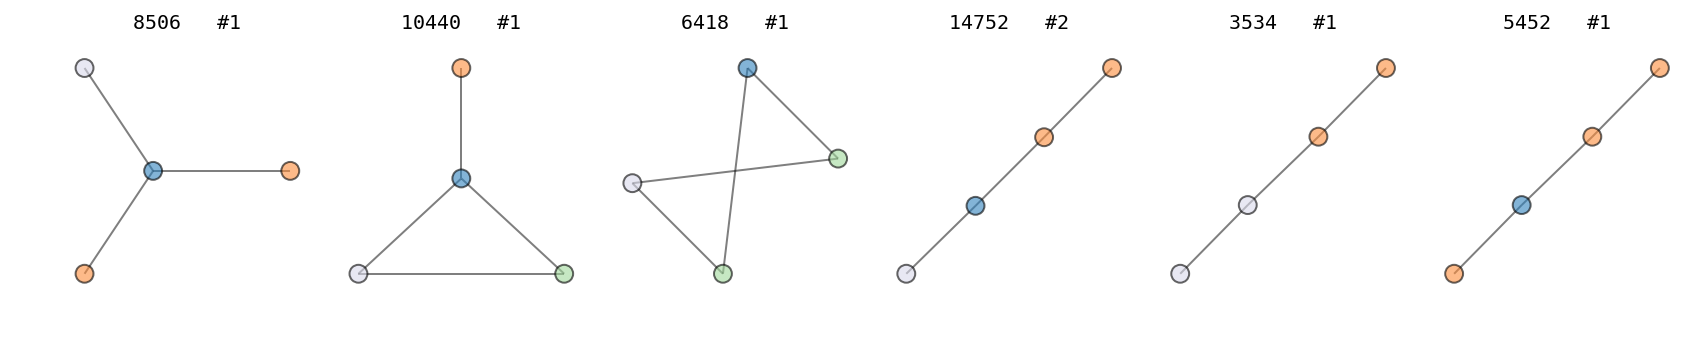

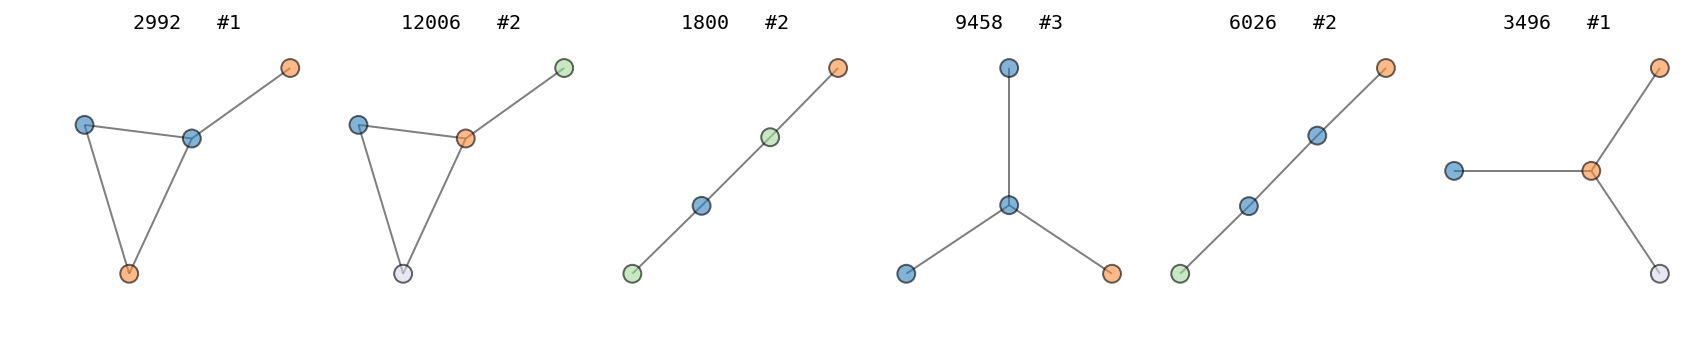

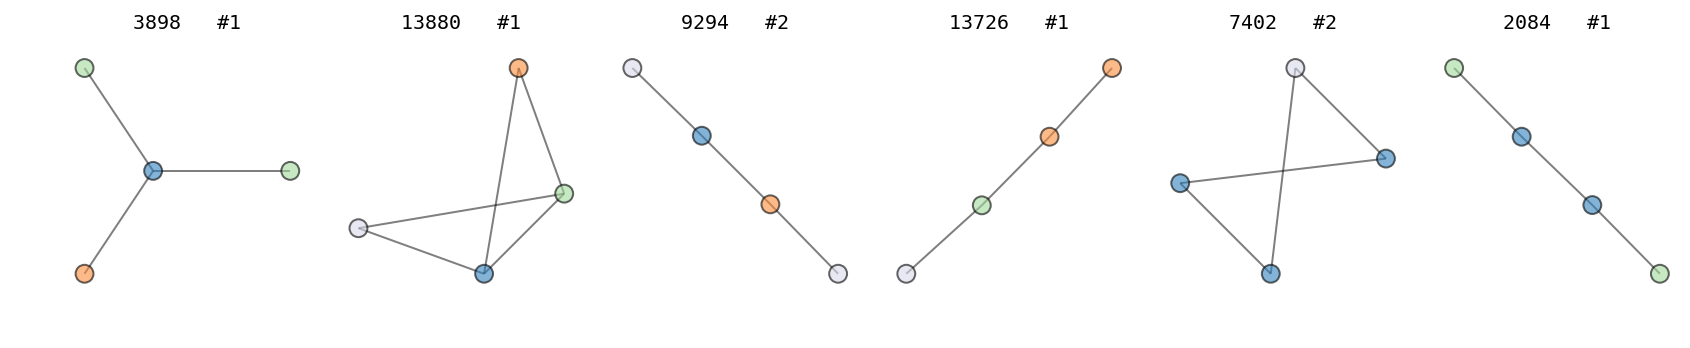

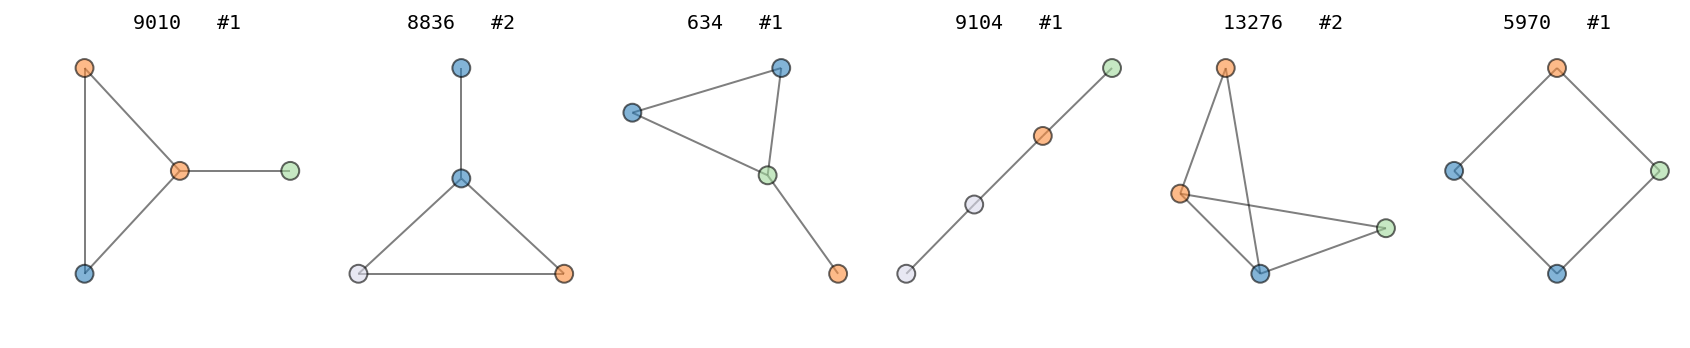

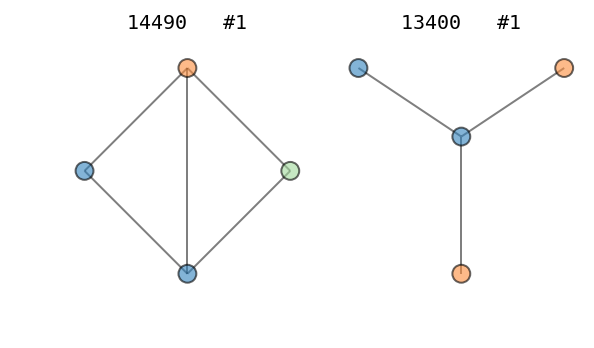

In [45]:
df = do_decompose(decompose_graphlet(size=4))
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


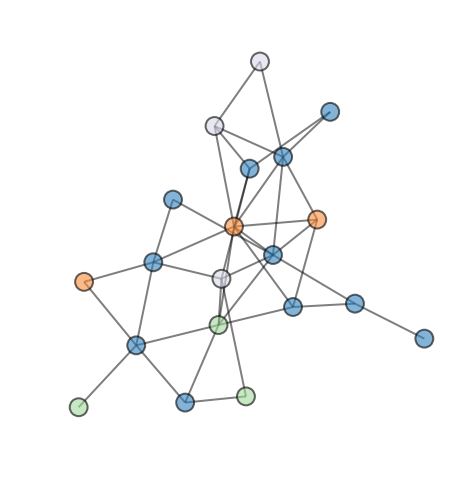

AttributeError: 'curry' object has no attribute 'subgraphs'

In [47]:
df = do_decompose(decompose_neighborhood, compose_function=decompose_intersection)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

---